['Urban', 'Rural', 'Suburban']
Categories (3, object): ['Rural', 'Suburban', 'Urban']


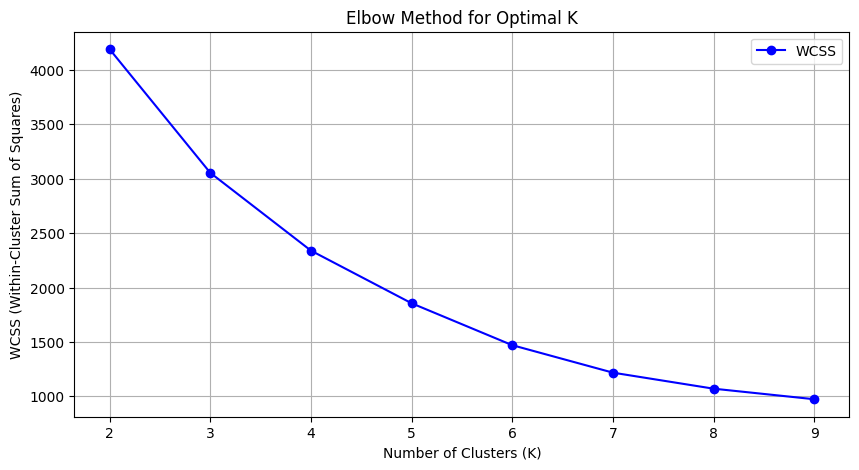

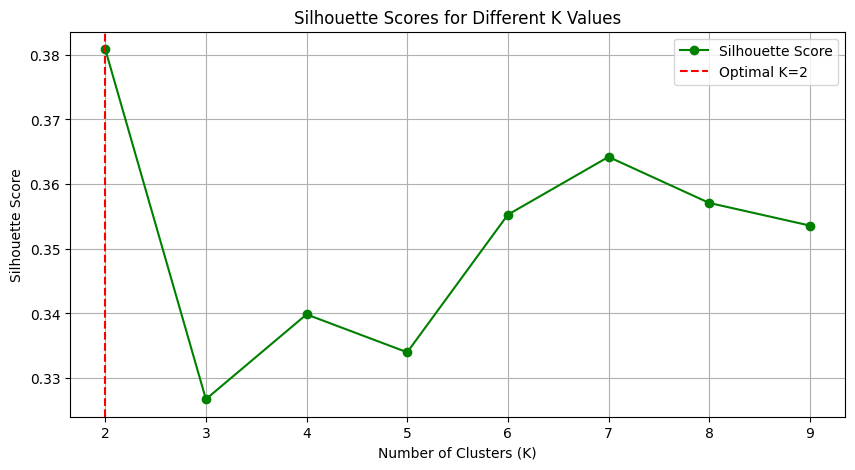

Optimal number of clusters based on Silhouette Score: 2
Final Silhouette Score for K=2: 0.381


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset
home_df = pd.read_csv("home.csv")

# Selecting relevant columns and dropping missing values
home_cluster_df = home_df[['residents', 'hometype', 'income_band',
                           'equivalised_income', 'urban_rural_class', 'build_era']].dropna()

# Ensure 'urban_rural_class' keeps original labels for visualization
category_mapping = {'1': 'Urban', '2': 'Suburban', '3+': 'Rural'}
home_cluster_df['urban_rural_class'] = home_cluster_df['urban_rural_class'].replace(category_mapping)

# Convert to categorical type for correct display in plots
home_cluster_df['urban_rural_class'] = home_cluster_df['urban_rural_class'].astype('category')

# Verify the changes
print(home_cluster_df['urban_rural_class'].unique())


# Removing outliers using IQR method on 'residents'
Q1 = home_cluster_df['residents'].quantile(0.25)
Q3 = home_cluster_df['residents'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
home_cluster_df = home_cluster_df[(home_cluster_df['residents'] >= lower_bound) & (home_cluster_df['residents'] <= upper_bound)]

# Encode categorical variables
label_enc = LabelEncoder()
for col in ['hometype', 'income_band', 'equivalised_income', 'urban_rural_class', 'build_era']:
    if col in home_cluster_df.columns:
        home_cluster_df[col] = label_enc.fit_transform(home_cluster_df[col])

# Normalize numerical column for better clustering
scaler = StandardScaler()
home_cluster_df[['residents']] = scaler.fit_transform(home_cluster_df[['residents']])

# Initialize lists for evaluation
wcss = []  # Within-cluster sum of squares
silhouette_scores = []
k_values = list(range(2, 10))  # Testing K values from 2 to 9

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(home_cluster_df)

    # Append WCSS (Elbow Method)
    wcss.append(kmeans.inertia_)

    if len(set(cluster_labels)) > 1:
        score = silhouette_score(home_cluster_df, cluster_labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(np.nan)  # Use NaN instead of None

valid_k_values = k_values[:len(silhouette_scores)]


if np.any(np.isnan(silhouette_scores)):
    silhouette_scores = np.nan_to_num(silhouette_scores, nan=-1)
optimal_k = valid_k_values[np.argmax(silhouette_scores)]

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b', label="WCSS")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.xticks(k_values)
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(valid_k_values, silhouette_scores, marker='o', linestyle='-', color='g', label="Silhouette Score")
if optimal_k:
    plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal K={optimal_k}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K Values')
plt.grid(True)
plt.xticks(valid_k_values)
plt.legend()
plt.show()

# Print optimal number of clusters
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k}")

# Apply K-Means with the optimal K found
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
home_cluster_df['Cluster'] = kmeans.fit_predict(home_cluster_df)

# Calculate Final Silhouette Score
final_silhouette = silhouette_score(home_cluster_df.drop(columns=['Cluster']), home_cluster_df['Cluster'])
print(f"Final Silhouette Score for K={optimal_k}: {final_silhouette:.3f}")

In [3]:
# Apply K-Means Clustering with K=2
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
home_cluster_df['Cluster'] = kmeans.fit_predict(home_cluster_df)

# Calculate Final Silhouette Score
silhouette_avg = silhouette_score(home_cluster_df.drop(columns=['Cluster']), home_cluster_df['Cluster'])
print(f"Final Silhouette Score for K={optimal_k}: {silhouette_avg:.3f}")

Final Silhouette Score for K=2: 0.381


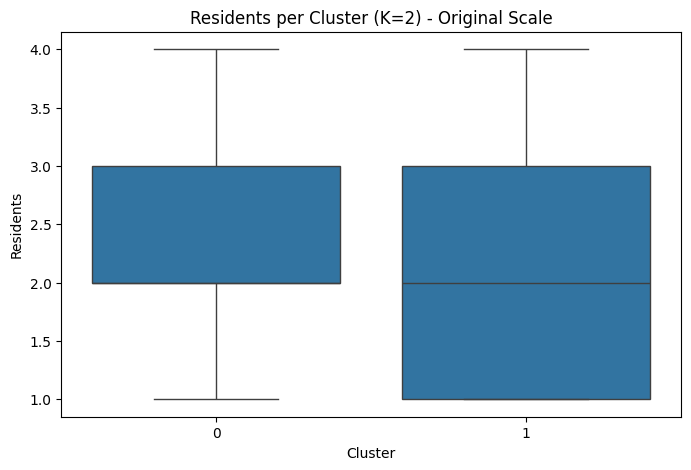

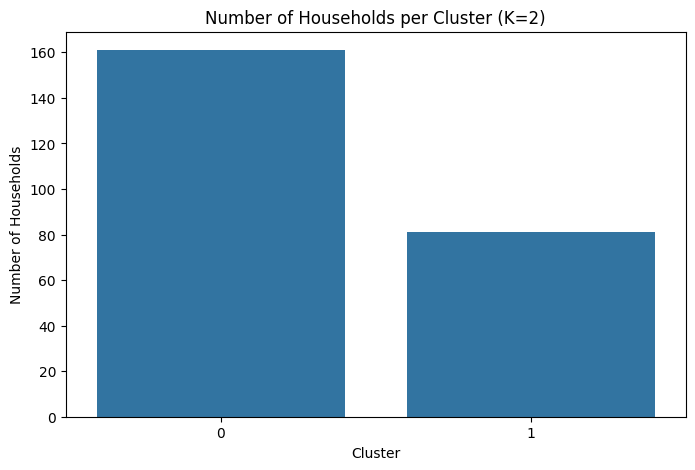

In [4]:
# Convert residents back to original values
home_cluster_df['residents_original'] = scaler.inverse_transform(home_cluster_df[['residents']])

# Plot using original values
plt.figure(figsize=(8, 5))
sns.boxplot(data=home_cluster_df, x='Cluster', y='residents_original')
plt.title("Residents per Cluster (K=2) - Original Scale")
plt.xlabel("Cluster")
plt.ylabel("Residents")
plt.show()

# Countplot: Number of households per cluster
plt.figure(figsize=(8, 5))
sns.countplot(data=home_cluster_df, x='Cluster')
plt.title("Number of Households per Cluster (K=2)")
plt.xlabel("Cluster")
plt.ylabel("Number of Households")
plt.show()

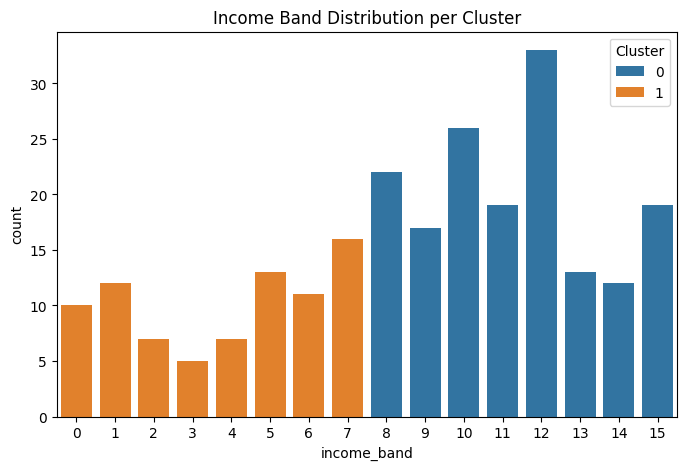

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(data=home_cluster_df, x='income_band', hue='Cluster')
plt.title("Income Band Distribution per Cluster")
plt.show()

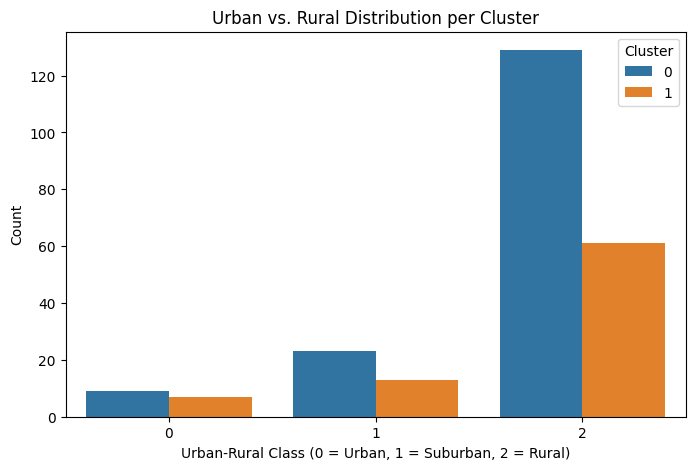

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(data=home_cluster_df, x='urban_rural_class', hue='Cluster')
plt.title("Urban vs. Rural Distribution per Cluster")
plt.xlabel("Urban-Rural Class (0 = Urban, 1 = Suburban, 2 = Rural)")
plt.ylabel("Count")
plt.show()

In [7]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
home_cluster_df['Cluster'] = kmeans.fit_predict(home_cluster_df)

silhouette_avg = silhouette_score(home_cluster_df.drop(columns=['Cluster']), home_cluster_df['Cluster'])
print(f"Final Silhouette Score for K={optimal_k}: {silhouette_avg:.3f}")

Final Silhouette Score for K=4: 0.321


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [9]:
home_df = pd.read_csv("home.csv")
person_df = pd.read_csv("person.csv")
meterreading_df = pd.read_csv("meterreading.csv")
tariff_df = pd.read_csv("tariff.csv")

In [10]:
print("Home Dataset Columns:", home_df.columns)
print("Meter Reading Dataset Columns:", meterreading_df.columns)
print(home_df.info())
print(home_df.describe())

Home Dataset Columns: Index(['homeid', 'install_type', 'location', 'residents', 'starttime',
       'starttime_enhanced', 'endtime', 'cohortid', 'income_band',
       'study_class', 'hometype', 'equivalised_income', 'occupancy',
       'urban_rural_class', 'urban_rural_name', 'build_era', 'new_build_year',
       'smart_monitors', 'smart_automation', 'occupied_days',
       'occupied_nights', 'entry_floor', 'outdoor_space', 'outdoor_drying'],
      dtype='object')
Meter Reading Dataset Columns: Index(['homeid', 'provenance', 'provenancedetail', 'energytype', 'date',
       'reading'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   homeid              255 non-null    int64  
 1   install_type        255 non-null    object 
 2   location            255 non-null    object 
 3   residents           255 non-nul

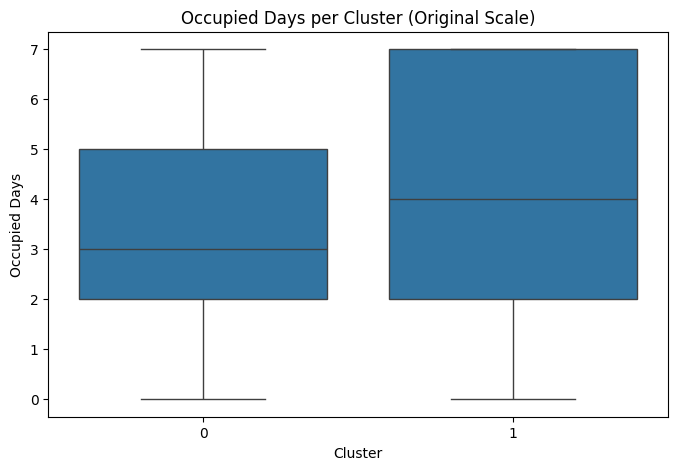

In [11]:
# Reload dataset
home_df = pd.read_csv("/content/home.csv")  # Ensure correct file path in Colab

# Check if 'occupied_days' exists in the dataset
if 'occupied_days' in home_df.columns:
    # Selecting relevant columns and dropping missing values
    home_cluster_df = home_df[['residents', 'hometype', 'income_band',
                               'equivalised_income', 'urban_rural_class', 'build_era', 'occupied_days']].dropna()

    # Encode categorical variables
    label_enc = LabelEncoder()
    for col in ['hometype', 'income_band', 'equivalised_income', 'urban_rural_class', 'build_era']:
        home_cluster_df[col] = label_enc.fit_transform(home_cluster_df[col])

    # Apply K-Means Clustering with K=2 (without standardizing 'occupied_days')
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    home_cluster_df['Cluster'] = kmeans.fit_predict(home_cluster_df)

    # Plot boxplot for occupied days per cluster without standardization
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=home_cluster_df, x='Cluster', y='occupied_days')
    plt.title("Occupied Days per Cluster (Original Scale)")
    plt.xlabel("Cluster")
    plt.ylabel("Occupied Days")
    plt.show()

else:
    print("Column 'occupied_days' not found in the dataset.")


In [12]:
import pandas as pd

# Load all CSVs
home_df = pd.read_csv("/content/home.csv")
meter_df = pd.read_csv("/content/meterreading.csv")  # Example dataset for energy readings

# Display column names to check for energy-related variables
print("Home CSV Columns:", home_df.columns)
print("Meter Reading CSV Columns:", meter_df.columns)

# Display the first few rows
print("\nHome Data Sample:")
print(home_df.head())

print("\nMeter Reading Data Sample:")
print(meter_df.head())


Home CSV Columns: Index(['homeid', 'install_type', 'location', 'residents', 'starttime',
       'starttime_enhanced', 'endtime', 'cohortid', 'income_band',
       'study_class', 'hometype', 'equivalised_income', 'occupancy',
       'urban_rural_class', 'urban_rural_name', 'build_era', 'new_build_year',
       'smart_monitors', 'smart_automation', 'occupied_days',
       'occupied_nights', 'entry_floor', 'outdoor_space', 'outdoor_drying'],
      dtype='object')
Meter Reading CSV Columns: Index(['homeid', 'provenance', 'provenancedetail', 'energytype', 'date',
       'reading'],
      dtype='object')

Home Data Sample:
   homeid install_type   location  residents         starttime  \
0      47     standard  Edinburgh          2  10/08/2016 00:00   
1      59     standard  Edinburgh          2  06/10/2016 00:00   
2      61     enhanced  Edinburgh          2  06/10/2016 00:00   
3      62     enhanced  Edinburgh          2  26/08/2016 00:00   
4      64     standard  Edinburgh          4 

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load home dataset
home_df = pd.read_csv("/content/home.csv")

# Selecting relevant columns for clustering
features = ["residents", "income_band", "equivalised_income", "urban_rural_class", "occupied_days"]
home_cluster_df = home_df[["homeid"] + features].dropna()

# Encode categorical variables
home_cluster_df = pd.get_dummies(home_cluster_df, columns=["income_band", "equivalised_income", "urban_rural_class"])

# Scale numerical columns
scaler = StandardScaler()
home_cluster_df[["residents", "occupied_days"]] = scaler.fit_transform(home_cluster_df[["residents", "occupied_days"]])

# Apply K-Means clustering (Assume K=2 from previous analysis)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
home_cluster_df["Cluster"] = kmeans.fit_predict(home_cluster_df.drop(columns=["homeid"]))

# Merge back into main home dataset
home_cluster_df = home_df[["homeid", "residents", "occupied_days", "urban_rural_class"]].merge(
    home_cluster_df[["homeid", "Cluster"]], on="homeid", how="left"
)






In [14]:
print(home_cluster_df.head())


   homeid  residents  occupied_days urban_rural_class  Cluster
0      47          2              2                 1        1
1      59          2              3                 1        1
2      61          2              2                 1        1
3      62          2              1                 1        1
4      64          4              6                 1        0


Clustering applied successfully!


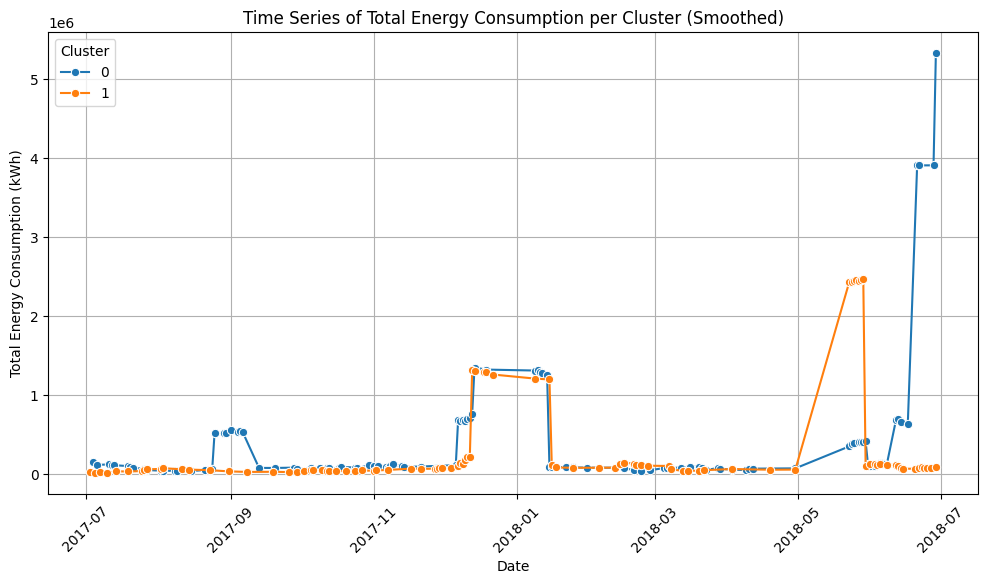

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load datasets
home_cluster_df = pd.read_csv("home.csv")
meter_reading_df = pd.read_csv("meterreading.csv")

# Convert 'date' to datetime format
meter_reading_df["date"] = pd.to_datetime(meter_reading_df["date"])

# Select relevant features for clustering
features = ["residents", "occupied_days", "urban_rural_class"]

# Ensure numeric encoding for categorical data
for col in ["urban_rural_class"]:
    if home_cluster_df[col].dtype == "object":
        home_cluster_df[col] = LabelEncoder().fit_transform(home_cluster_df[col])

# Drop missing values to ensure proper clustering
home_cluster_df = home_cluster_df.dropna(subset=features)

# Standardize numerical columns
scaler = StandardScaler()
home_cluster_df[features] = scaler.fit_transform(home_cluster_df[features])

# Apply K-Means clustering (K=2 based on previous analysis)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
home_cluster_df["Cluster"] = kmeans.fit_predict(home_cluster_df[features])

print("Clustering applied successfully!")

# Convert 'Cluster' to integer (ensuring proper merging)
home_cluster_df["Cluster"] = home_cluster_df["Cluster"].astype(int)

# Aggregate total energy consumption per home per day
daily_energy = meter_reading_df.groupby(["homeid", "date"])["reading"].sum().reset_index()

# Merge with home_cluster_df to get cluster assignments
energy_df = daily_energy.merge(home_cluster_df[["homeid", "Cluster"]], on="homeid", how="left")

# Drop missing values in cluster assignments
energy_df = energy_df.dropna(subset=["Cluster"])

# Convert 'Cluster' to integer
energy_df["Cluster"] = energy_df["Cluster"].astype(int)

# Filter data from July 2017 onwards
energy_df = energy_df[energy_df["date"] >= "2017-07-01"]

# Compute **total energy consumption per cluster per day**
energy_clustered = energy_df.groupby(["date", "Cluster"])["reading"].sum().reset_index()

# Compute **rolling average** (7-day window for smoother trends)
energy_clustered["rolling_avg"] = energy_clustered.groupby("Cluster")["reading"].transform(lambda x: x.rolling(7, min_periods=1).mean())

# 📊 **Plot Time Series**
plt.figure(figsize=(12, 6))
sns.lineplot(data=energy_clustered, x="date", y="rolling_avg", hue="Cluster", marker="o")

plt.title("Time Series of Total Energy Consumption per Cluster (Smoothed)")
plt.xlabel("Date")
plt.ylabel("Total Energy Consumption (kWh)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Cluster")
plt.show()







In [16]:
print(home_cluster_df.columns)


Index(['homeid', 'install_type', 'location', 'residents', 'starttime',
       'starttime_enhanced', 'endtime', 'cohortid', 'income_band',
       'study_class', 'hometype', 'equivalised_income', 'occupancy',
       'urban_rural_class', 'urban_rural_name', 'build_era', 'new_build_year',
       'smart_monitors', 'smart_automation', 'occupied_days',
       'occupied_nights', 'entry_floor', 'outdoor_space', 'outdoor_drying',
       'Cluster'],
      dtype='object')


Clustering applied successfully!


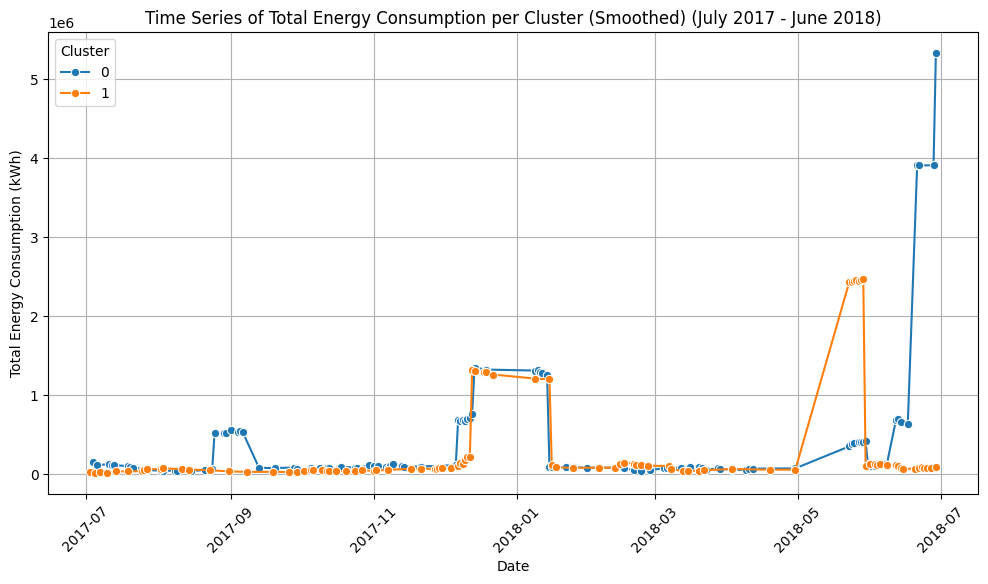

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load datasets
home_cluster_df = pd.read_csv("/content/home.csv")
meter_reading_df = pd.read_csv("/content/meterreading.csv")

# Convert 'date' to datetime format
meter_reading_df["date"] = pd.to_datetime(meter_reading_df["date"])

# Select relevant features for clustering
features = ["residents", "occupied_days", "urban_rural_class"]

# Ensure numeric encoding for categorical data
if home_cluster_df["urban_rural_class"].dtype == "object":
    home_cluster_df["urban_rural_class"] = LabelEncoder().fit_transform(home_cluster_df["urban_rural_class"])

# Drop missing values to ensure proper clustering
home_cluster_df = home_cluster_df.dropna(subset=features)

# Standardize numerical columns
scaler = StandardScaler()
home_cluster_df[features] = scaler.fit_transform(home_cluster_df[features])

# Apply K-Means clustering (K=2 based on previous analysis)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
home_cluster_df["Cluster"] = kmeans.fit_predict(home_cluster_df[features])

print("Clustering applied successfully!")

# Convert 'Cluster' to integer (ensuring proper merging)
home_cluster_df["Cluster"] = home_cluster_df["Cluster"].astype(int)

# Aggregate total energy consumption per home per day
daily_energy = meter_reading_df.groupby(["homeid", "date"])["reading"].sum().reset_index()

# Merge with home_cluster_df to get cluster assignments
energy_df = daily_energy.merge(home_cluster_df[["homeid", "Cluster"]], on="homeid", how="left")

# Drop missing values in cluster assignments
energy_df = energy_df.dropna(subset=["Cluster"])

# Convert 'Cluster' to integer
energy_df["Cluster"] = energy_df["Cluster"].astype(int)

# Filter data between July 2017 and June 2018
energy_df = energy_df[(energy_df["date"] >= "2017-07-01") & (energy_df["date"] <= "2018-06-30")]

# Compute **total energy consumption per cluster per day**
energy_clustered = energy_df.groupby(["date", "Cluster"])["reading"].sum().reset_index()

# Compute **rolling average** (7-day window for smoother trends)
energy_clustered["rolling_avg"] = energy_clustered.groupby("Cluster")["reading"].transform(lambda x: x.rolling(7, min_periods=1).mean())

# 📊 **Plot Time Series**
plt.figure(figsize=(12, 6))
sns.lineplot(data=energy_clustered, x="date", y="rolling_avg", hue="Cluster", marker="o")

plt.title("Time Series of Total Energy Consumption per Cluster (Smoothed) (July 2017 - June 2018)")
plt.xlabel("Date")
plt.ylabel("Total Energy Consumption (kWh)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Cluster")
plt.show()



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure date is in datetime format
electricity_df["date"] = pd.to_datetime(electricity_df["date"])

# Compute total daily energy usage per home
electricity_df["daily_energy_usage"] = electricity_df.groupby("homeid")["reading"].diff().abs()
electricity_df = electricity_df.dropna()  # Remove NaN rows

# Aggregate **total energy consumption** per day
total_energy_time_series = electricity_df.groupby("date")["daily_energy_usage"].sum().reset_index()

# Plot Total Energy Consumption Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_energy_time_series, x="date", y="daily_energy_usage", marker="o", color="b")

plt.title("Total Daily Energy Consumption Over Time")
plt.xlabel("Date")
plt.ylabel("Total Energy Consumption (kWh)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


NameError: name 'electricity_df' is not defined

In [19]:
# Applying K-Means with Optimal K
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal K (based on Silhouette): {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
home_cluster_df['Cluster'] = kmeans.fit_predict(home_cluster_df_scaled)

# Calculate Final Silhouette Score
silhouette_avg = silhouette_score(home_cluster_df_scaled, home_cluster_df['Cluster'])
print(f"Final Silhouette Score: {silhouette_avg:.3f}")

# Visualization of Clusters
sns.boxplot(data=home_cluster_df, x='Cluster', y='residents')
plt.title("Residents per Cluster (Outliers Removed)")
plt.show()

sns.countplot(data=home_cluster_df, x='Cluster')
plt.title("Distribution of Households by Cluster")
plt.show()

Optimal K (based on Silhouette): 2


NameError: name 'home_cluster_df_scaled' is not defined

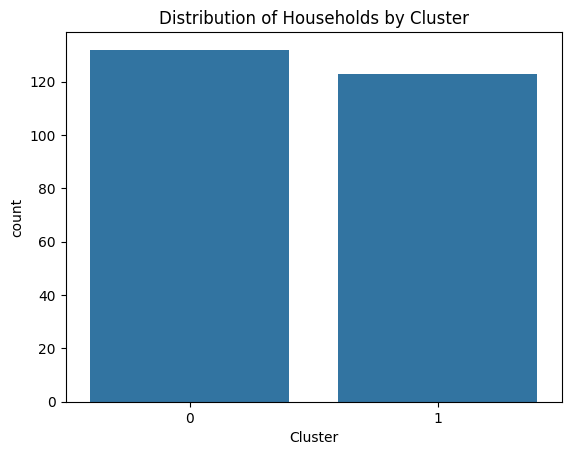

In [20]:
sns.countplot(data=home_cluster_df, x='Cluster')
plt.title("Distribution of Households by Cluster")
plt.show()


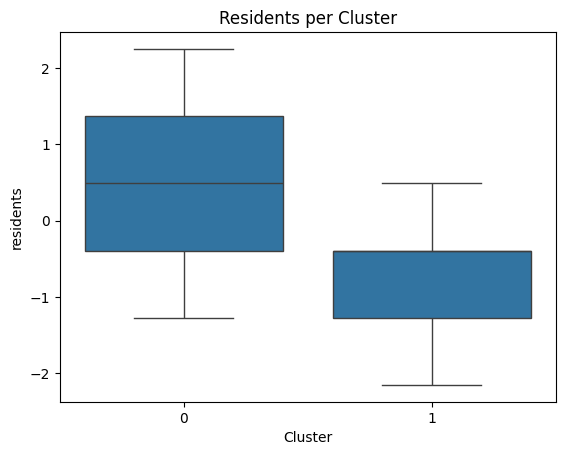

In [21]:
sns.boxplot(data=home_cluster_df, x='Cluster', y='residents')
plt.title("Residents per Cluster")
plt.show()


In [22]:
# Select relevant columns for clustering
cluster_df = home_df[['homeid', 'residents', 'income_band', 'hometype',
                      'equivalised_income', 'urban_rural_class', 'build_era',
                      'occupied_days', 'occupied_nights']]


# Handle categorical variables by applying one-hot encoding
cluster_df = pd.get_dummies(cluster_df, columns=['income_band', 'hometype',
                                                 'equivalised_income', 'urban_rural_class', 'build_era'])
# Drop rows with missing values (if necessary)
cluster_df = cluster_df.dropna()

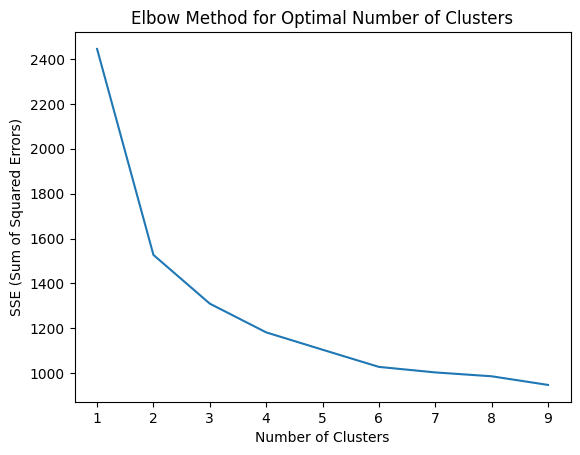

   homeid  Cluster
0      47        2
1      59        2
2      61        2
3      62        2
4      64        0


In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Ensure 'homeid' is excluded from the clustering process
numerical_columns = cluster_df.drop('homeid', axis=1)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 10):  # Testing k from 1 to 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numerical_columns)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), sse)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()

# Fit KMeans with the chosen number of clusters (replace 3 with the optimal number)
optimal_k = 3  # Replace with the actual value based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(numerical_columns)

# Check the resulting DataFrame with the assigned clusters
print(cluster_df[['homeid', 'Cluster']].head())


In [24]:
# Assuming optimal clusters is 3 (replace with actual value from elbow plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(cluster_df)


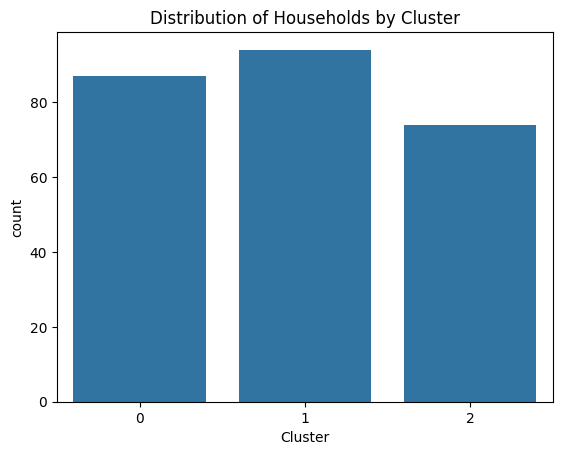

In [25]:
import seaborn as sns
sns.countplot(data=cluster_df, x='Cluster')
plt.title("Distribution of Households by Cluster")
plt.show()


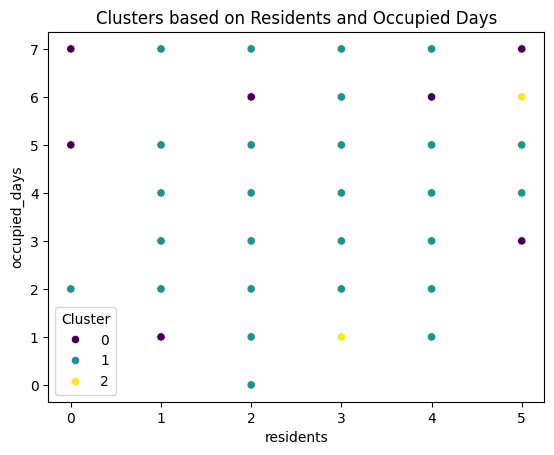

In [26]:
sns.scatterplot(data=cluster_df, x='residents', y='occupied_days', hue='Cluster', palette='viridis')
plt.title("Clusters based on Residents and Occupied Days")
plt.show()


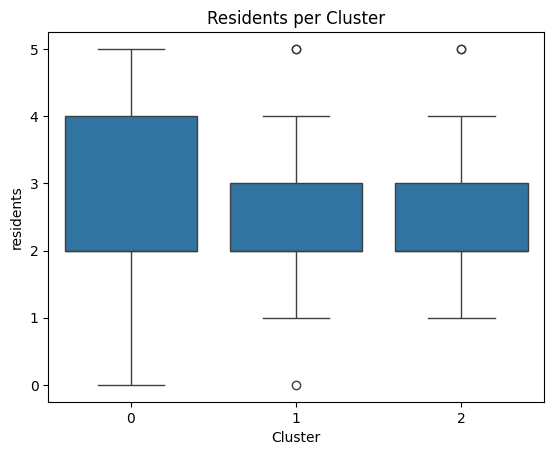

In [27]:
sns.boxplot(data=cluster_df, x='Cluster', y='residents')
plt.title("Residents per Cluster")
plt.show()


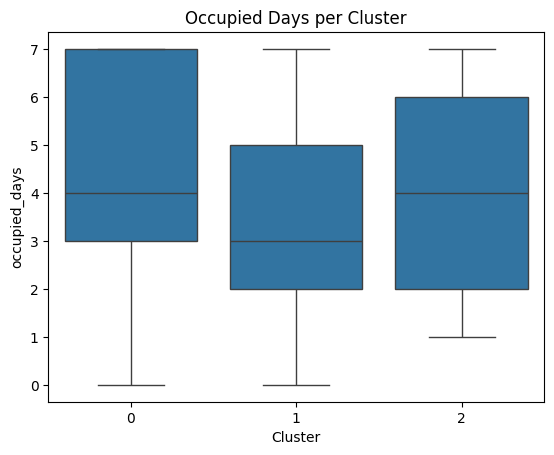

In [28]:
sns.boxplot(data=cluster_df, x='Cluster', y='occupied_days')
plt.title("Occupied Days per Cluster")
plt.show()


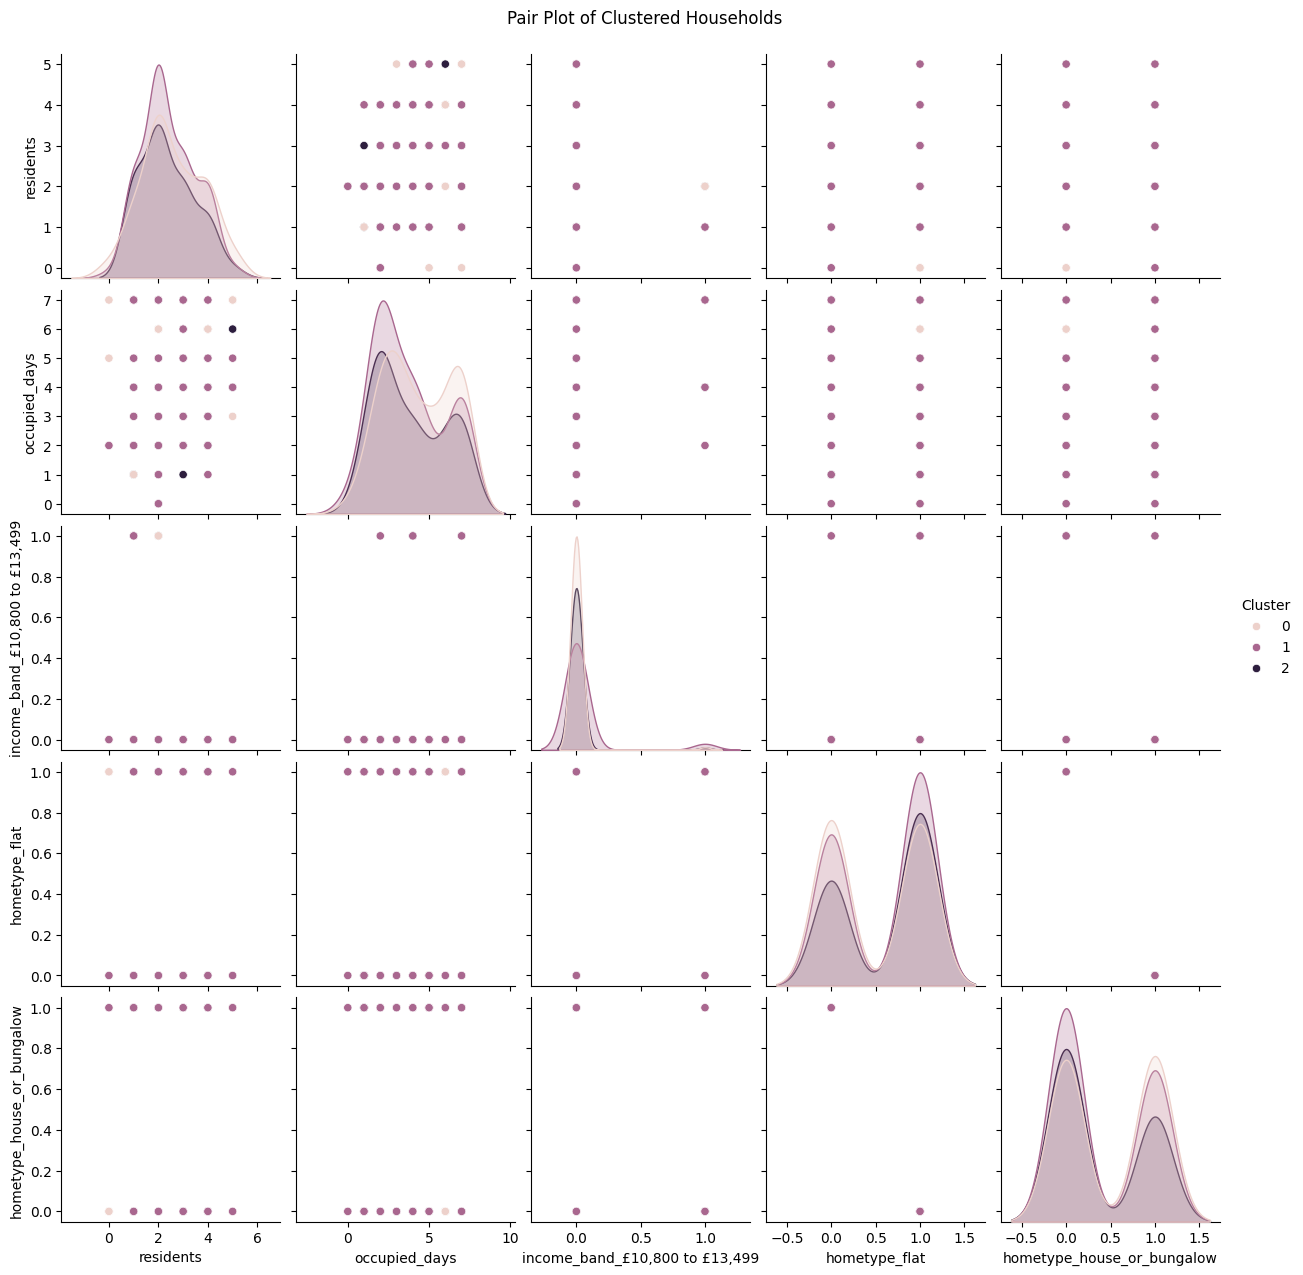

In [29]:
sns.pairplot(cluster_df, hue='Cluster',
             vars=['residents', 'occupied_days', 'income_band_£10,800 to £13,499',
                   'hometype_flat', 'hometype_house_or_bungalow'])
plt.suptitle("Pair Plot of Clustered Households", y=1.02)
plt.show()



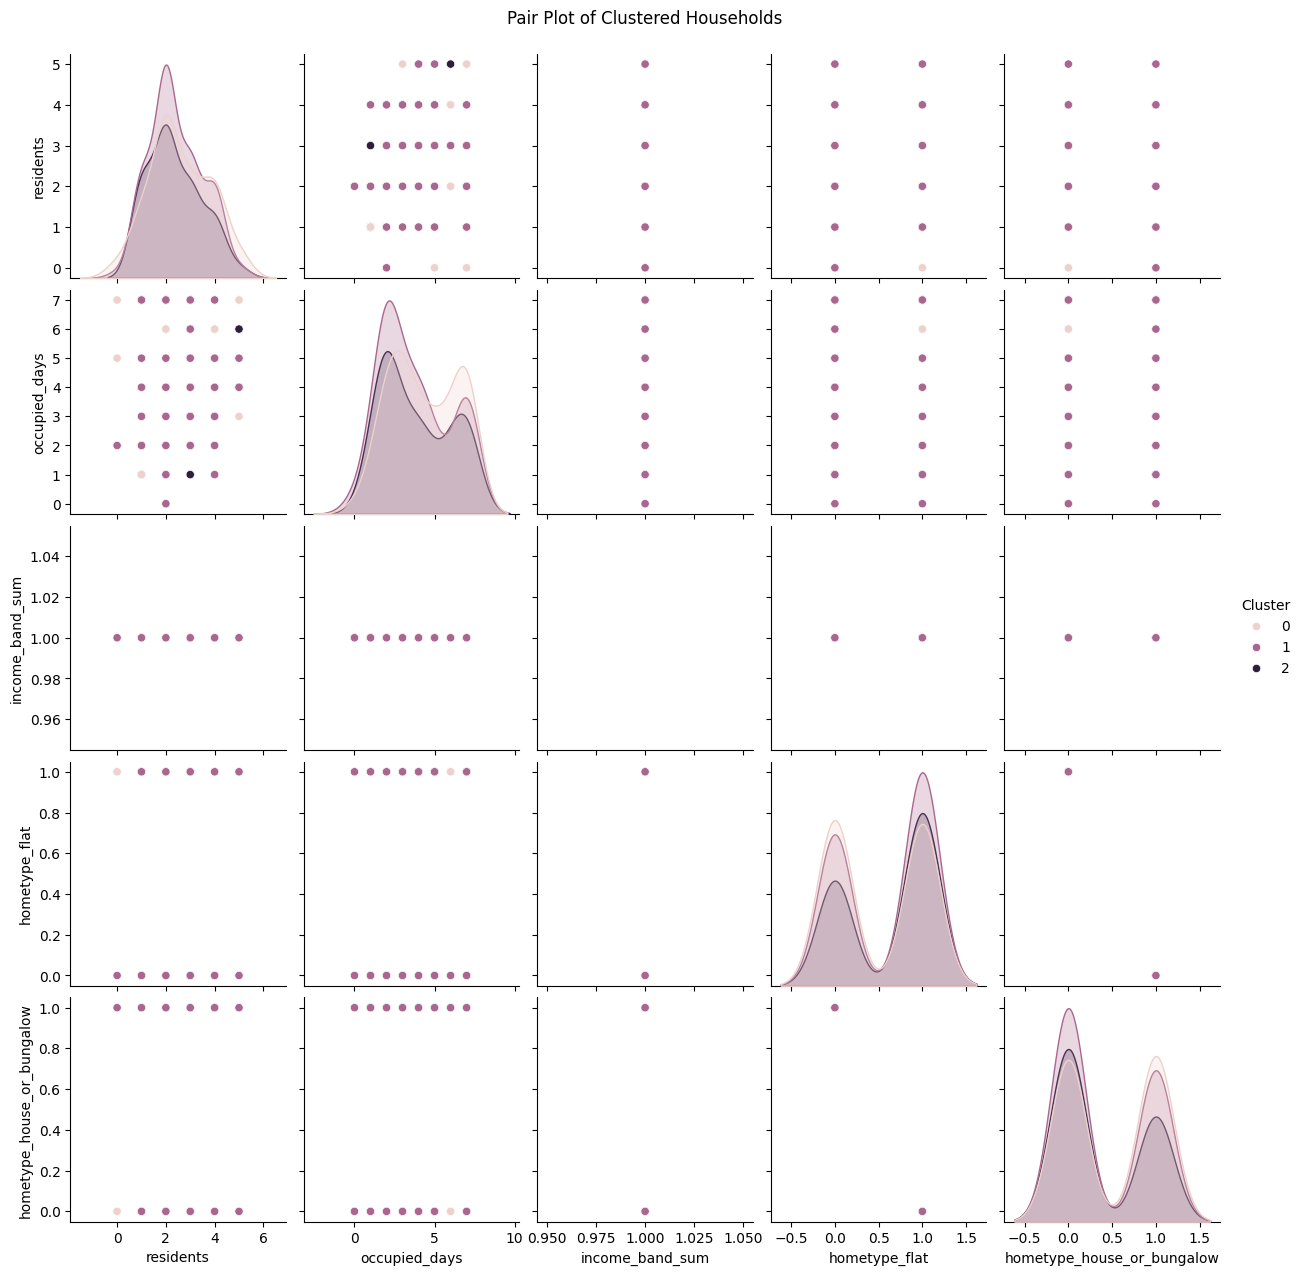

In [30]:
# Create a new column 'income_band_sum' by summing all one-hot encoded income bands
income_columns = [col for col in cluster_df.columns if 'income_band_' in col]
cluster_df['income_band_sum'] = cluster_df[income_columns].sum(axis=1)

# Update the pair plot
sns.pairplot(cluster_df, hue='Cluster',
             vars=['residents', 'occupied_days', 'income_band_sum',
                   'hometype_flat', 'hometype_house_or_bungalow'])
plt.suptitle("Pair Plot of Clustered Households", y=1.02)
plt.show()


In [31]:
cluster_summary = cluster_df.groupby('Cluster').mean()
print(cluster_summary)


             homeid  residents  occupied_days  occupied_nights  \
Cluster                                                          
0        190.298851   2.563218       4.321839         6.816092   
1        285.425532   2.404255       3.734043         6.627660   
2         99.108108   2.351351       3.837838         6.905405   

         income_band_Missing  income_band_less than £10,800  \
Cluster                                                       
0                   0.045977                       0.057471   
1                   0.021277                       0.010638   
2                   0.054054                       0.094595   

         income_band_£10,800 to £13,499  income_band_£13,500 to £16,199  \
Cluster                                                                   
0                              0.011494                        0.034483   
1                              0.053191                        0.010638   
2                              0.013514              

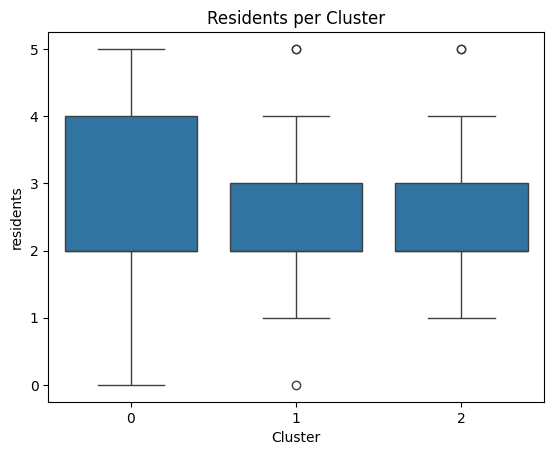

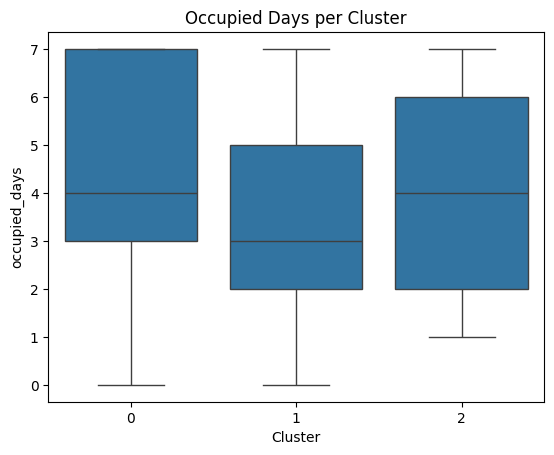

In [32]:
import seaborn as sns
sns.boxplot(data=cluster_df, x='Cluster', y='residents')
plt.title("Residents per Cluster")
plt.show()

sns.boxplot(data=cluster_df, x='Cluster', y='occupied_days')
plt.title("Occupied Days per Cluster")
plt.show()


In [33]:

print(meterreading_df.columns)
print(cluster_df.columns)


Index(['homeid', 'provenance', 'provenancedetail', 'energytype', 'date',
       'reading'],
      dtype='object')
Index(['homeid', 'residents', 'occupied_days', 'occupied_nights',
       'income_band_Missing', 'income_band_less than £10,800',
       'income_band_£10,800 to £13,499', 'income_band_£13,500 to £16,199',
       'income_band_£16,200 to £19,799', 'income_band_£19,800 to £23,399',
       'income_band_£23,400 to £26,999', 'income_band_£27,000 to £32,399',
       'income_band_£32,400 to £37,799', 'income_band_£37,800 to £43,199',
       'income_band_£43,200 to £48,599', 'income_band_£48,600 to £53,999',
       'income_band_£54,000 to £65,999', 'income_band_£66,000 to £77,999',
       'income_band_£78,000 to £89,999', 'income_band_£90,000 or more',
       'hometype_flat', 'hometype_house_or_bungalow',
       'equivalised_income_above_median', 'equivalised_income_below_median',
       'equivalised_income_missing', 'urban_rural_class_1',
       'urban_rural_class_2', 'urban_rural_c

In [34]:
clustered_consumption = pd.merge(meterreading_df, cluster_df[['homeid', 'Cluster']], on='homeid')


In [35]:
# Outlier removal using IQR
Q1 = daily_consumption['reading'].quantile(0.25)
Q3 = daily_consumption['reading'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = daily_consumption[(daily_consumption['reading'] >= lower_bound) & (daily_consumption['reading'] <= upper_bound)]

clusters = filtered_data['Cluster'].unique()
fig, axes = plt.subplots(len(clusters), 1, figsize=(12, 8), sharex=True)

for i, cluster in enumerate(clusters):
    sns.lineplot(
        data=filtered_data[filtered_data['Cluster'] == cluster],
        x='date',
        y='reading',
        ax=axes[i],
        label=f"Cluster {cluster}"
    )
    axes[i].set_title(f"Cluster {cluster}")
    axes[i].set_ylabel("Average Energy Consumption", labelpad=20)
    axes[i].grid(True, linestyle='--', alpha=0.7)

    # Set individual y-axis limits for better visibility
    axes[i].set_ylim(filtered_data[filtered_data['Cluster'] == cluster]['reading'].quantile(0.01),
                     filtered_data[filtered_data['Cluster'] == cluster]['reading'].quantile(0.99))

plt.xlabel("Date")
plt.tight_layout()
plt.show()

NameError: name 'daily_consumption' is not defined

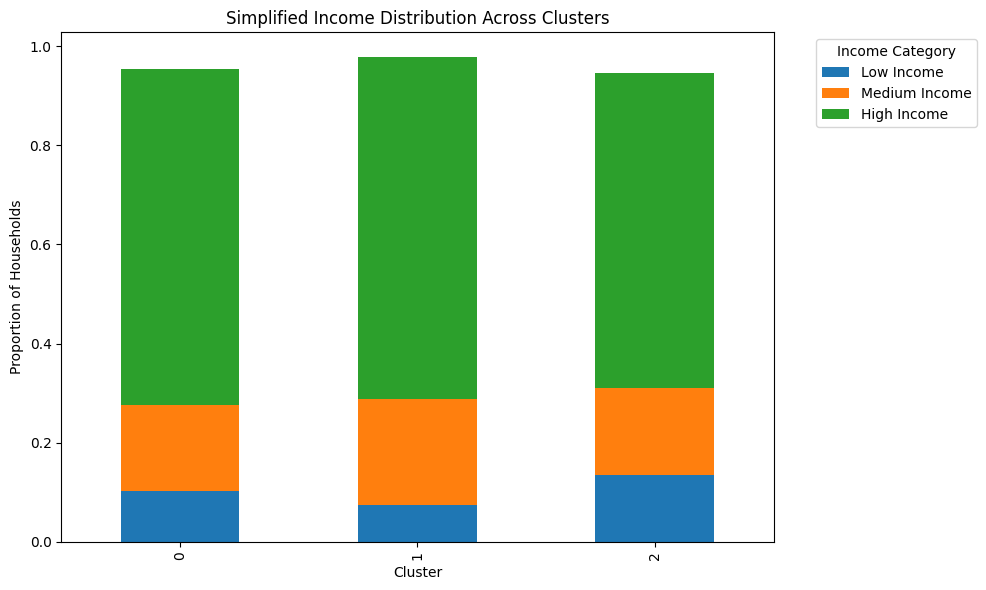

In [36]:
# Simplify income bands into broader categories
cluster_summary['Low Income'] = (
    cluster_summary[['income_band_less than £10,800',
                     'income_band_£10,800 to £13,499',
                     'income_band_£13,500 to £16,199']].sum(axis=1)
)

cluster_summary['Medium Income'] = (
    cluster_summary[['income_band_£16,200 to £19,799',
                     'income_band_£19,800 to £23,399',
                     'income_band_£23,400 to £26,999',
                     'income_band_£27,000 to £32,399']].sum(axis=1)
)

cluster_summary['High Income'] = (
    cluster_summary[['income_band_£32,400 to £37,799',
                     'income_band_£37,800 to £43,199',
                     'income_band_£43,200 to £48,599',
                     'income_band_£48,600 to £53,999',
                     'income_band_£54,000 to £65,999',
                     'income_band_£66,000 to £77,999',
                     'income_band_£78,000 to £89,999',
                     'income_band_£90,000 or more']].sum(axis=1)
)

# Plot simplified income distribution
simplified_income = cluster_summary[['Low Income', 'Medium Income', 'High Income']]
simplified_income.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Simplified Income Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Proportion of Households")
plt.legend(title="Income Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

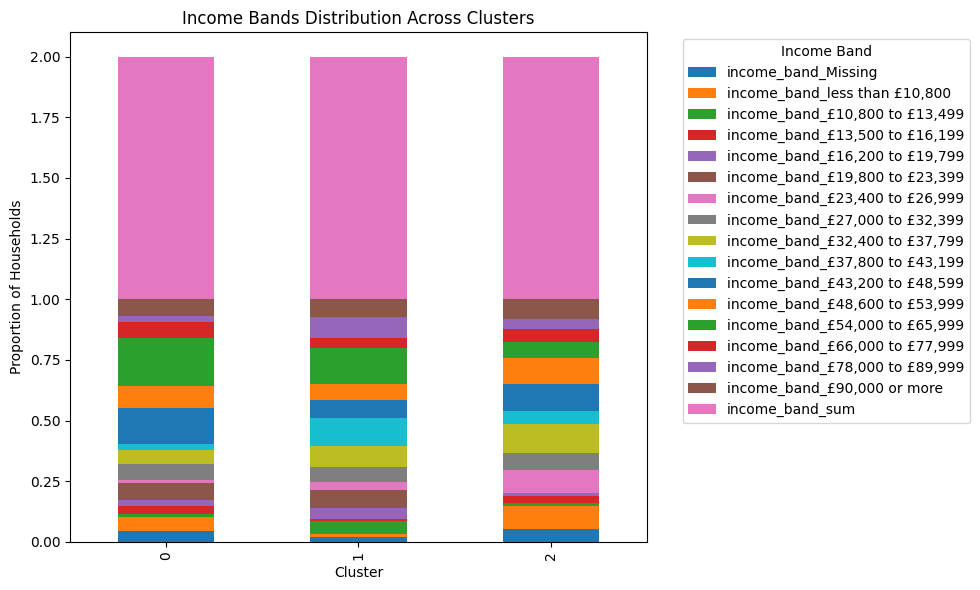

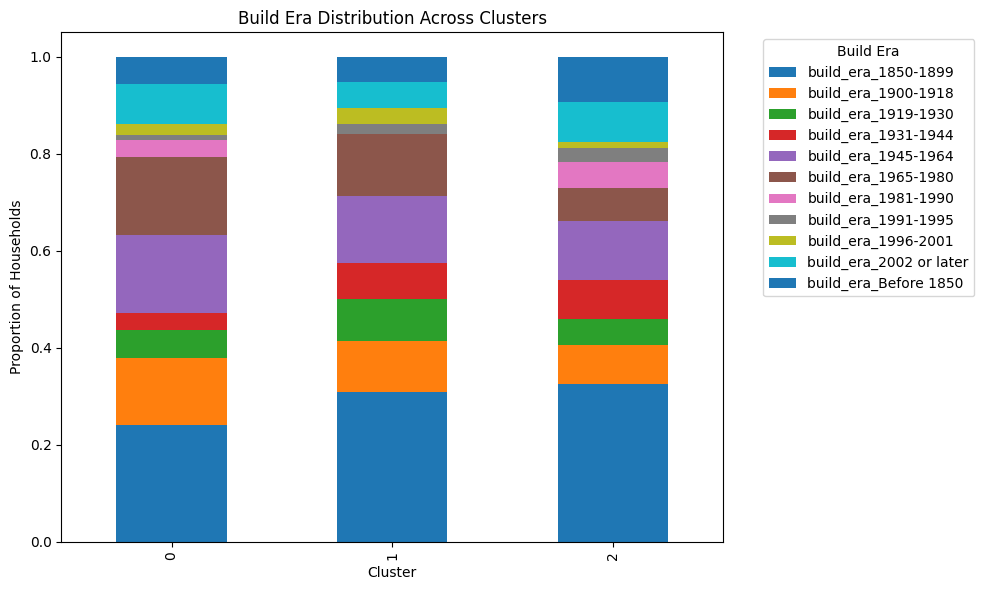

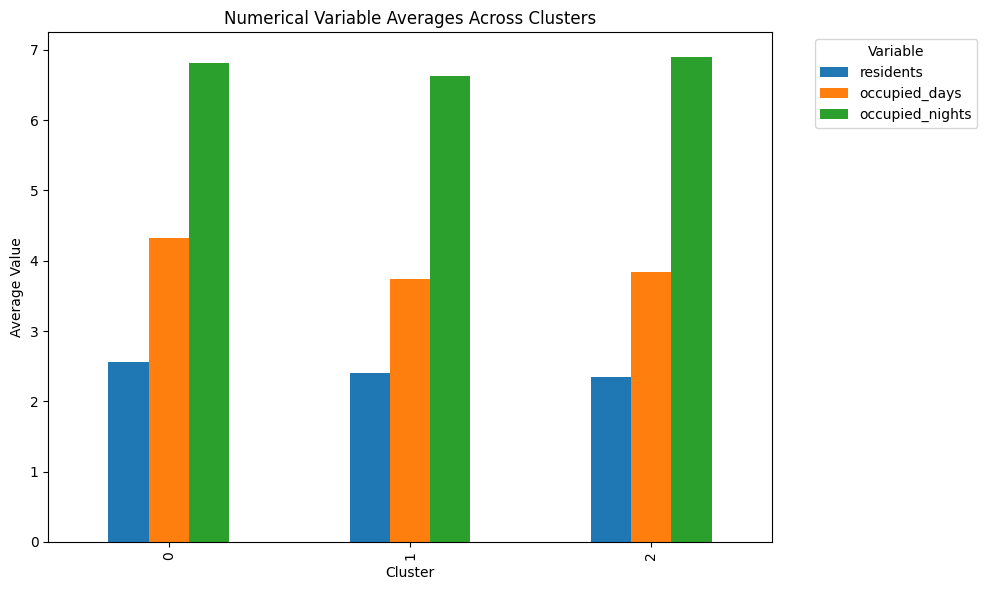

In [37]:
# Income bands distribution across clusters
income_bands = [col for col in cluster_summary.columns if "income_band" in col]
cluster_summary[income_bands].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Income Bands Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Proportion of Households")
plt.legend(title="Income Band", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Build eras distribution across clusters
build_eras = [col for col in cluster_summary.columns if "build_era" in col]
cluster_summary[build_eras].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Build Era Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Proportion of Households")
plt.legend(title="Build Era", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Numerical variables (residents, occupied days, occupied nights) across clusters
numerical_variables = ['residents', 'occupied_days', 'occupied_nights']
cluster_summary[numerical_variables].plot(kind='bar', figsize=(10, 6))
plt.title("Numerical Variable Averages Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Average Value")
plt.legend(title="Variable", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

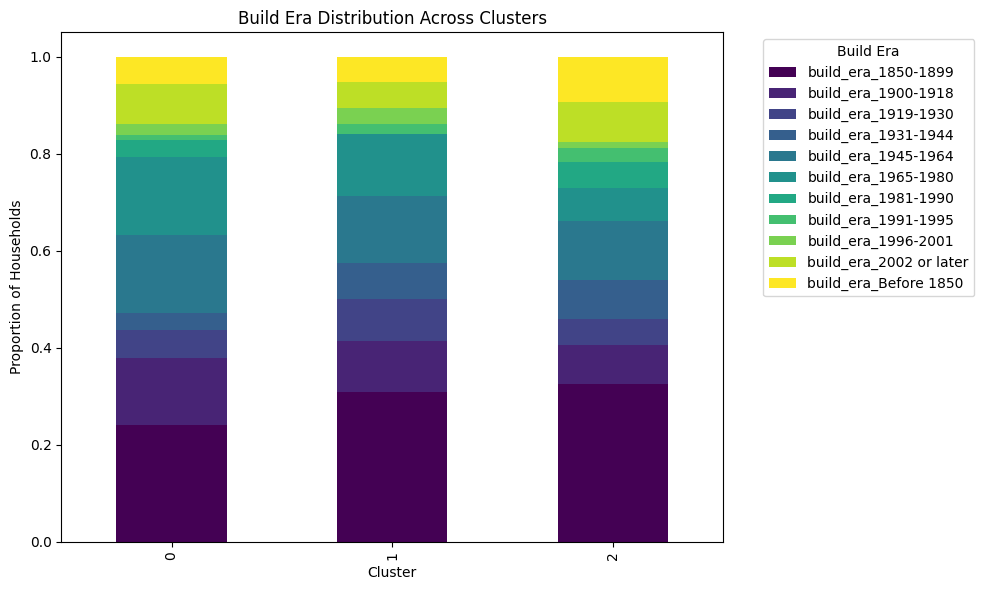

<ipython-input-38-10a6a9a8ebee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cluster_df, x="Cluster", y="residents", palette="Set2")


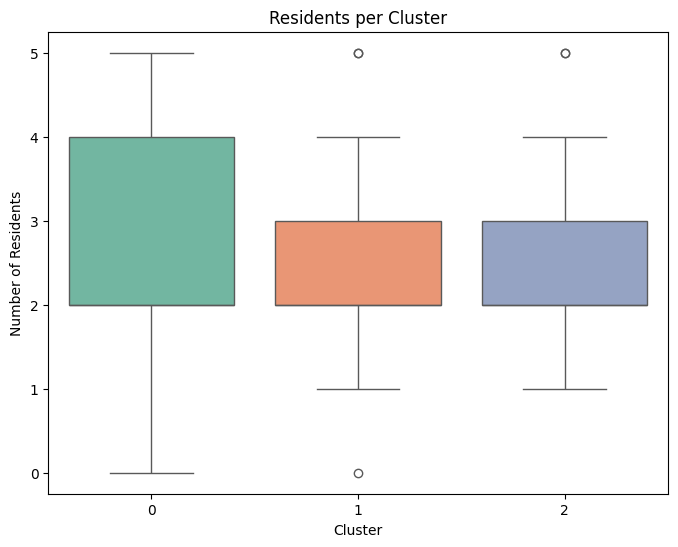

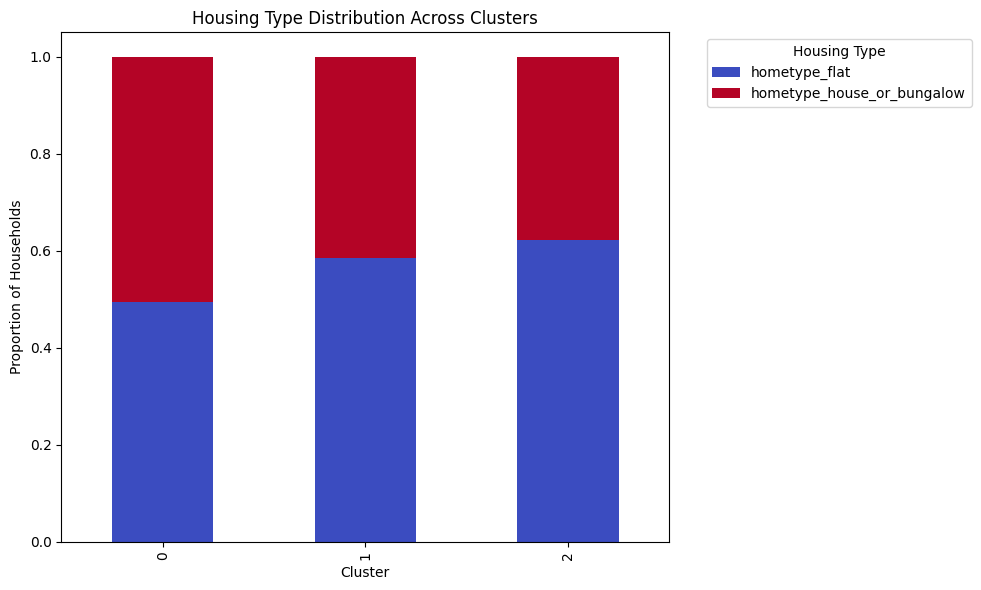

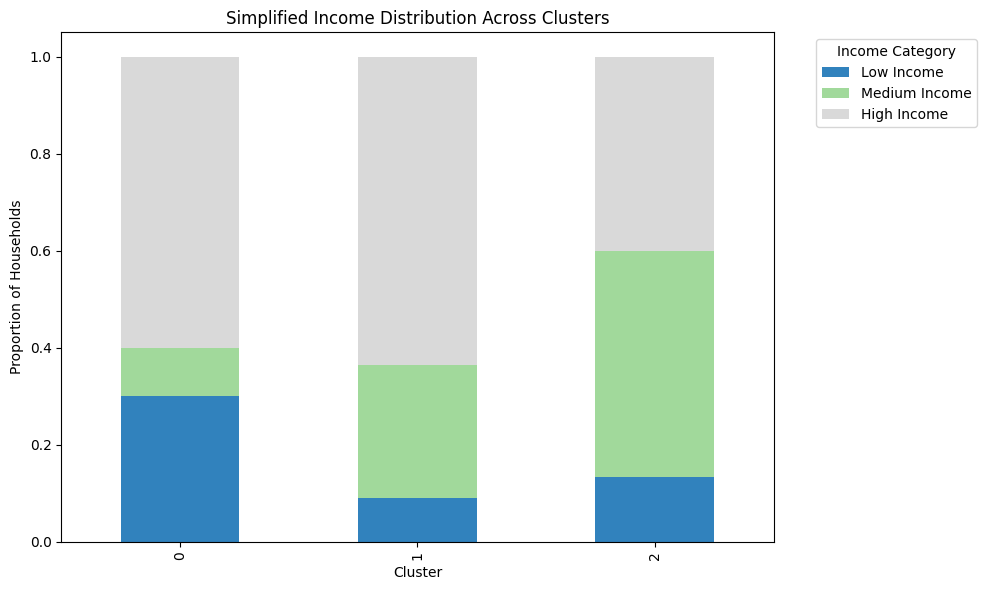

In [38]:

# Build Era: Stacked Bar Chart for Build Era Distribution Across Clusters
build_era_columns = [col for col in cluster_df.columns if "build_era_" in col]
build_era_distribution = cluster_df.groupby("Cluster")[build_era_columns].mean()

build_era_distribution.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="viridis"
)
plt.title("Build Era Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Proportion of Households")
plt.legend(title="Build Era", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Household Size (Residents): Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=cluster_df, x="Cluster", y="residents", palette="Set2")
plt.title("Residents per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Residents")
plt.show()

# Housing Type: Stacked Bar Chart for Housing Types Across Clusters
housing_type_columns = [col for col in cluster_df.columns if "hometype_" in col]
housing_type_distribution = cluster_df.groupby("Cluster")[housing_type_columns].mean()

housing_type_distribution.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="coolwarm"
)
plt.title("Housing Type Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Proportion of Households")
plt.legend(title="Housing Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Income Element (Simplified): Stacked Bar Chart for Simplified Income Levels
income_categories = {
    "income_band_less than £10,800": "Low Income",
    "income_band_£10,800 to £13,499": "Low Income",
    "income_band_£13,500 to £16,199": "Low Income",
    "income_band_£16,200 to £19,799": "Medium Income",
    "income_band_£19,800 to £23,399": "Medium Income",
    "income_band_£23,400 to £26,999": "Medium Income",
    "income_band_£27,000 to £32,399": "High Income",
    "income_band_£32,400 to £37,799": "High Income",
    "income_band_£37,800 to £43,199": "High Income",
    "income_band_£43,200 to £48,599": "High Income",
    "income_band_£48,600 to £53,999": "High Income",
    "income_band_£54,000 to £65,999": "High Income",
    "income_band_£66,000 to £77,999": "High Income",
    "income_band_£78,000 to £89,999": "High Income",
    "income_band_£90,000 or more": "High Income",
}
simplified_income = pd.DataFrame()
simplified_income["Cluster"] = cluster_df["Cluster"]
for income_band, category in income_categories.items():
    if income_band in cluster_df.columns:
        simplified_income[category] = cluster_df[income_band]

simplified_income_distribution = simplified_income.groupby("Cluster").sum()
simplified_income_distribution = (
    simplified_income_distribution.div(simplified_income_distribution.sum(axis=1), axis=0)
)

simplified_income_distribution.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="tab20c"
)
plt.title("Simplified Income Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Proportion of Households")
plt.legend(title="Income Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

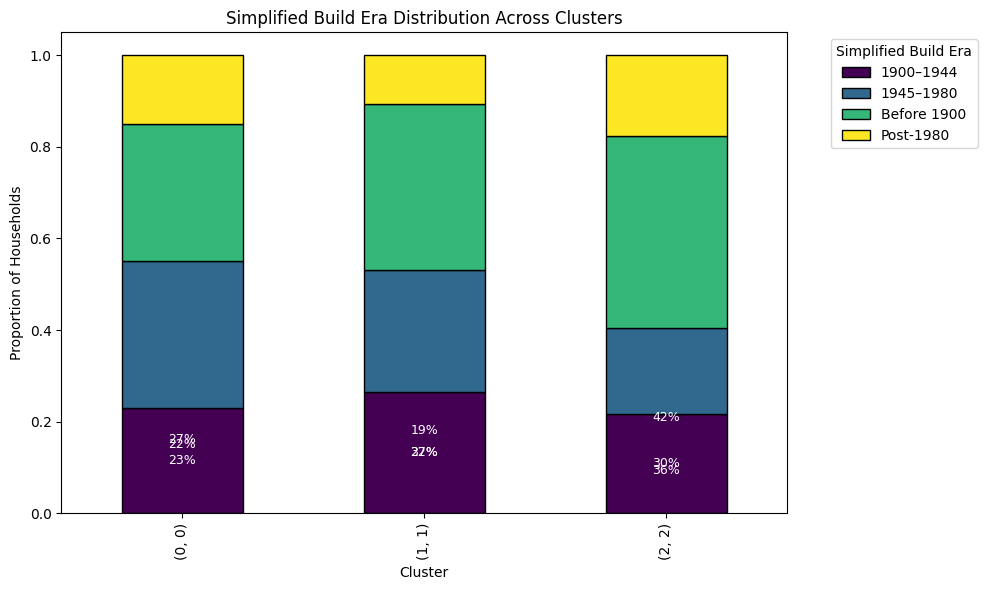

In [39]:
# Simplify Build Era Categories
simplified_build_era = {
    "build_era_Before 1850": "Before 1900",
    "build_era_1850-1899": "Before 1900",
    "build_era_1900-1918": "1900–1944",
    "build_era_1919-1930": "1900–1944",
    "build_era_1931-1944": "1900–1944",
    "build_era_1945-1964": "1945–1980",
    "build_era_1965-1980": "1945–1980",
    "build_era_1981-1990": "Post-1980",
    "build_era_1991-1995": "Post-1980",
    "build_era_1996-2001": "Post-1980",
    "build_era_2002 or later": "Post-1980",
}

# Apply Simplified Categories
cluster_df["Simplified Build Era"] = cluster_df[
    [col for col in cluster_df.columns if "build_era_" in col]
].idxmax(axis=1).replace(simplified_build_era)

# Calculate Proportions
simplified_build_era_distribution = (
    cluster_df.groupby(["Cluster", "Simplified Build Era"])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .unstack(fill_value=0)
)

# Plot Simplified Build Era Distribution
simplified_build_era_distribution.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="viridis",
    edgecolor="black"
)
plt.title("Simplified Build Era Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Proportion of Households")
plt.legend(title="Simplified Build Era", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add percentage annotations
for i, bar_group in enumerate(simplified_build_era_distribution.iterrows()):
    for j, (value, bar) in enumerate(zip(bar_group[1], plt.gca().containers[i])):
        if value > 0.05:  # Only annotate if the value is significant
            plt.gca().text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() / 2,
                f"{value:.0%}",
                ha="center",
                va="center",
                fontsize=9,
                color="white"
            )

plt.tight_layout()
plt.show()


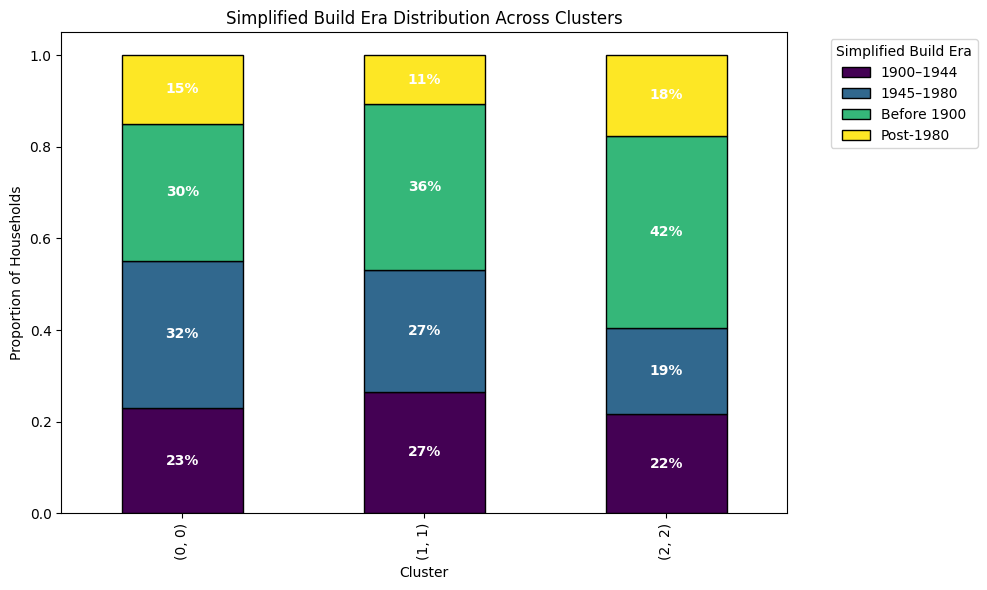

In [40]:
# Plot Simplified Build Era Distribution
ax = simplified_build_era_distribution.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="viridis",
    edgecolor="black"
)
plt.title("Simplified Build Era Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Proportion of Households")
plt.legend(title="Simplified Build Era", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add percentage annotations
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only annotate non-zero bars
            ax.annotate(
                f"{height:.0%}",
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                ha="center",
                va="center",
                fontsize=10,
                color="white",
                weight="bold"
            )

plt.tight_layout()
plt.show()



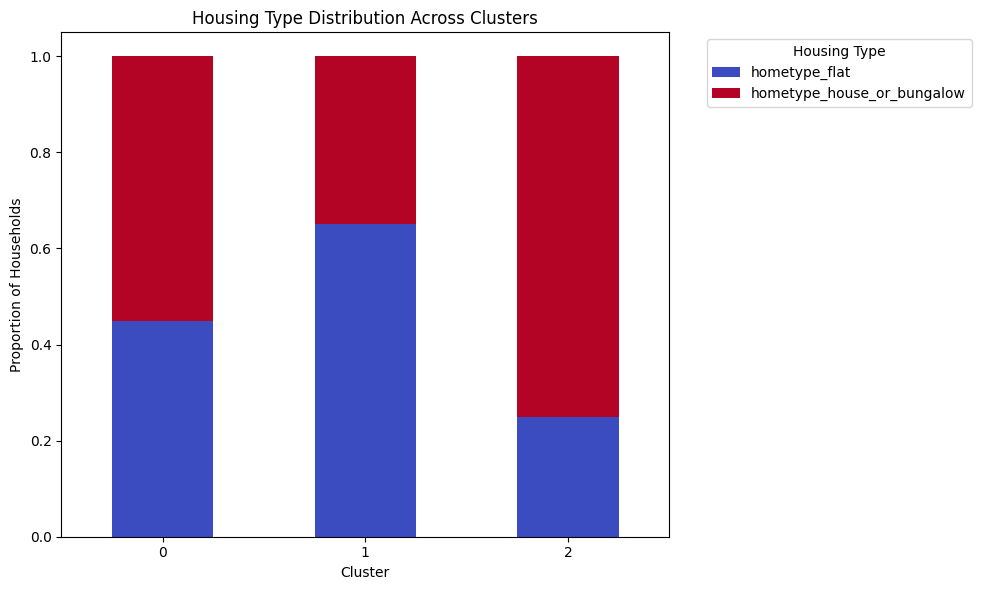

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame structure (replace with your actual data)
data = {
    "Cluster": [0, 0, 1, 1, 2, 2],
    "hometype_flat": [0.4, 0.5, 0.6, 0.7, 0.3, 0.2],
    "hometype_house_or_bungalow": [0.6, 0.5, 0.4, 0.3, 0.7, 0.8]
}
cluster_df = pd.DataFrame(data)

# Calculate the mean housing type distribution for each cluster
housing_type_columns = [col for col in cluster_df.columns if "hometype_" in col]
housing_type_distribution = cluster_df.groupby("Cluster")[housing_type_columns].mean()

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
housing_type_distribution.plot(
    kind="bar",
    stacked=True,
    colormap="coolwarm",
    ax=ax
)

# Customizing the plot
plt.title("Housing Type Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Proportion of Households")
plt.legend(title="Housing Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [42]:
import pandas as pd

# Load appliance.csv data
appliance_file_path = 'appliance.csv'  # Replace with your file path if needed
appliance_df = pd.read_csv(appliance_file_path)

# Explore the dataset
print(appliance_df.info())  # Overview of the data
print(appliance_df.describe(include='all'))  # Summary statistics

# Select relevant columns for clustering
appliance_cluster_df = appliance_df[['homeid', 'applianceclass', 'powertype', 'appliancetype', 'appliancesubtype', 'number']]

# Handle missing values (drop rows with missing data for simplicity)
appliance_cluster_df = appliance_cluster_df.dropna()

# Apply one-hot encoding to categorical columns
appliance_cluster_df = pd.get_dummies(
    appliance_cluster_df,
    columns=['applianceclass', 'powertype', 'appliancetype', 'appliancesubtype']
)

# Display the processed DataFrame
print(appliance_cluster_df.info())
print(appliance_cluster_df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440 entries, 0 to 3439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   applianceid       3440 non-null   int64 
 1   homeid            3440 non-null   int64 
 2   roomid            3440 non-null   int64 
 3   applianceclass    3440 non-null   object
 4   powertype         3438 non-null   object
 5   appliancetype     3440 non-null   object
 6   appliancesubtype  3440 non-null   object
 7   number            3440 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 215.1+ KB
None
        applianceid       homeid       roomid applianceclass powertype  \
count   3440.000000  3440.000000  3440.000000           3440      3438   
unique          NaN          NaN          NaN              4         3   
top             NaN          NaN          NaN           food  electric   
freq            NaN          NaN          NaN           1721      2134   
mean   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440 entries, 0 to 3439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   applianceid       3440 non-null   int64 
 1   homeid            3440 non-null   int64 
 2   roomid            3440 non-null   int64 
 3   applianceclass    3440 non-null   object
 4   powertype         3438 non-null   object
 5   appliancetype     3440 non-null   object
 6   appliancesubtype  3440 non-null   object
 7   number            3440 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 215.1+ KB
None
        applianceid       homeid       roomid applianceclass powertype  \
count   3440.000000  3440.000000  3440.000000           3440      3438   
unique          NaN          NaN          NaN              4         3   
top             NaN          NaN          NaN           food  electric   
freq            NaN          NaN          NaN           1721      2134   
mean   

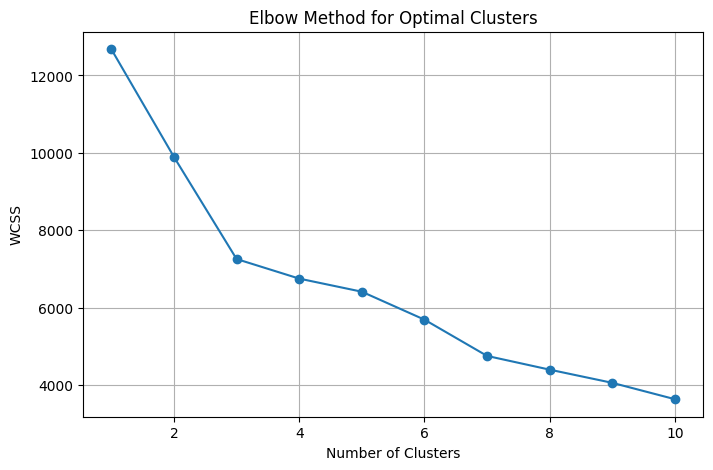

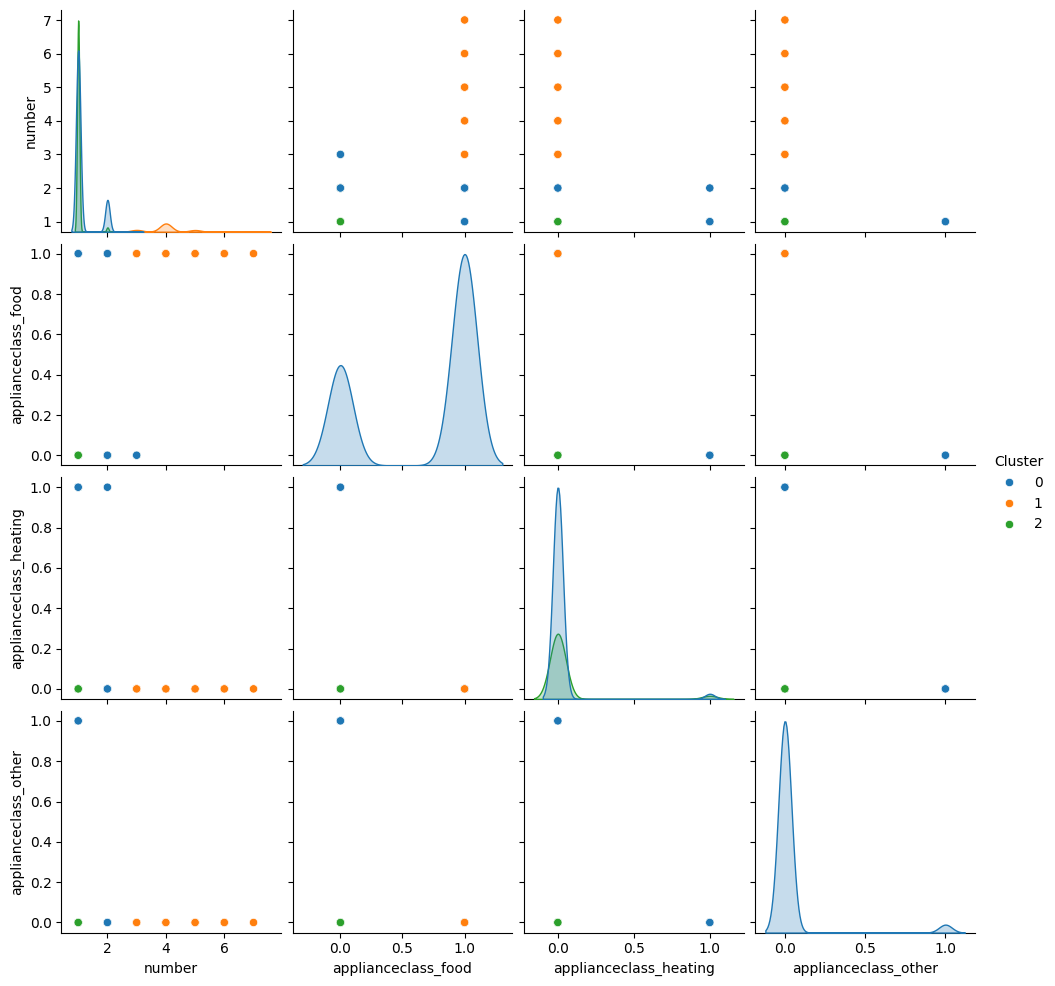

   homeid  Cluster
0      47        1
1      47        0
2      47        0
3      47        0
4      47        0


In [43]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load appliance.csv data
appliance_file_path = 'appliance.csv'  # Replace with your file path if needed
appliance_df = pd.read_csv(appliance_file_path)

# Explore the dataset
print(appliance_df.info())  # Overview of the data
print(appliance_df.describe(include='all'))  # Summary statistics

# Select relevant columns for clustering
appliance_cluster_df = appliance_df[['homeid', 'applianceclass', 'powertype', 'appliancetype', 'appliancesubtype', 'number']]

# Handle missing values (drop rows with missing data for simplicity)
appliance_cluster_df = appliance_cluster_df.dropna()

# Apply one-hot encoding to categorical columns
appliance_cluster_df = pd.get_dummies(
    appliance_cluster_df,
    columns=['applianceclass', 'powertype', 'appliancetype', 'appliancesubtype']
)

# Display the processed DataFrame
print(appliance_cluster_df.info())
print(appliance_cluster_df.head())

# K-Means Clustering
# Select features for clustering (excluding 'homeid')
features = appliance_cluster_df.drop('homeid', axis=1)

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Perform K-Means Clustering with an optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
appliance_cluster_df['Cluster'] = kmeans.fit_predict(features)

# Visualize the Clusters using a Pairplot (for a subset of features)
sns.pairplot(appliance_cluster_df, vars=features.columns[:4], hue='Cluster', palette='tab10')
plt.show()

# Display the clustered DataFrame
print(appliance_cluster_df[['homeid', 'Cluster']].head())

# The clustering results are stored in the 'Cluster' column of the DataFrame

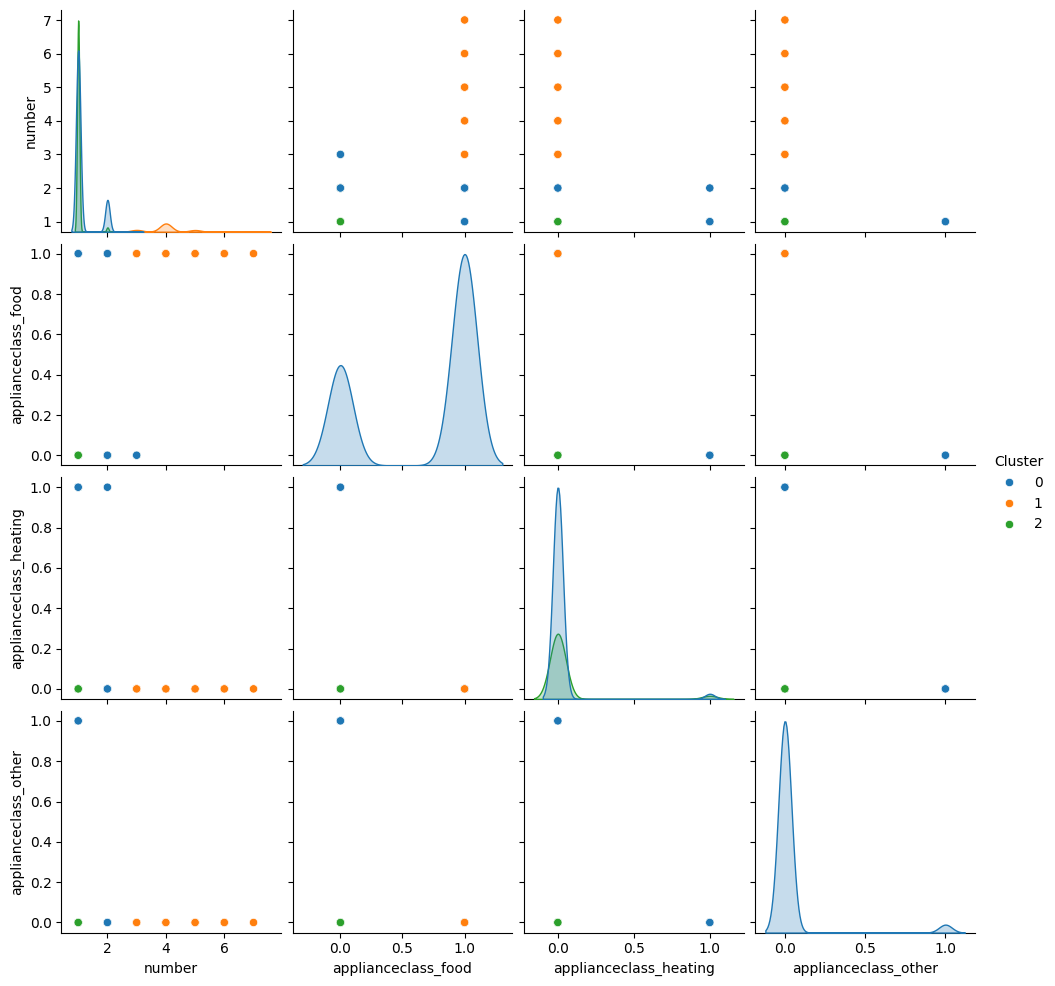

   homeid  Cluster
0      47        1
1      47        0
2      47        0
3      47        0
4      47        0


In [44]:
# Visualize the Clusters using a Pairplot (for a subset of features)
sns.pairplot(appliance_cluster_df, vars=features.columns[:4], hue='Cluster', palette='tab10')
plt.show()

# Save the clustered DataFrame to a new CSV file
appliance_cluster_df.to_csv('appliance_clustered.csv', index=False)

# Display the clustered DataFrame
print(appliance_cluster_df[['homeid', 'Cluster']].head())

# The clustering results are stored in the 'Cluster' column of the DataFrame


<ipython-input-45-57e32f37bc73>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=electric_appliances, x='Cluster', palette='viridis')


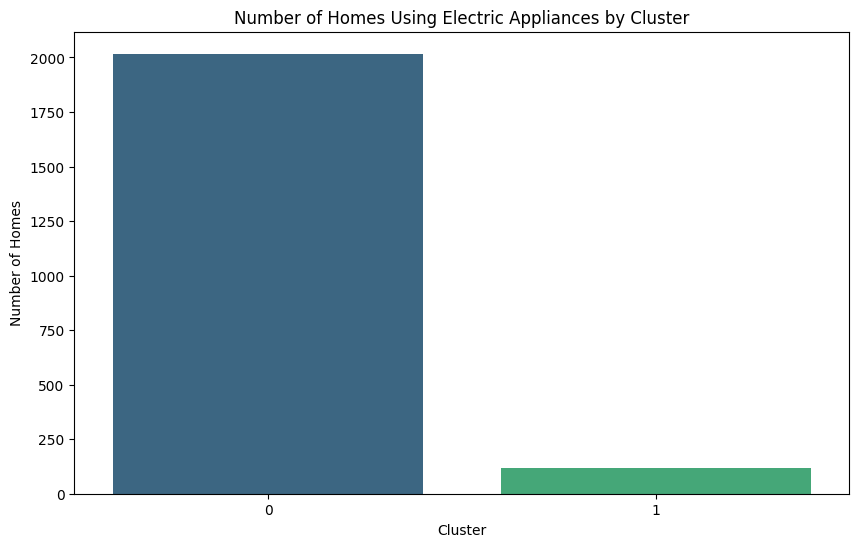

In [45]:
# Additional Visualization: Homes Using Electric Appliances
electric_appliances = appliance_cluster_df[appliance_cluster_df['powertype_electric'] == 1]

plt.figure(figsize=(10, 6))
sns.countplot(data=electric_appliances, x='Cluster', palette='viridis')
plt.title('Number of Homes Using Electric Appliances by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Homes')
plt.show()

# The clustering results and visualizations for electric appliances are ready.


In [46]:
# Load and explore meterreading.csv
meterreading_file_path = 'meterreading.csv'  # Replace with your file path if needed
meterreading_df = pd.read_csv(meterreading_file_path)

# Explore the dataset
print(meterreading_df.info())  # Overview of the data
print(meterreading_df.describe(include='all'))  # Summary statistics

# Check for missing values
missing_values = meterreading_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Display the first few rows of the dataset
print(meterreading_df.head())

# The meterreading.csv dataset is now ready for further analysis and visualization.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   homeid            746 non-null    int64  
 1   provenance        746 non-null    object 
 2   provenancedetail  746 non-null    object 
 3   energytype        746 non-null    object 
 4   date              746 non-null    object 
 5   reading           746 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 35.1+ KB
None
            homeid  provenance    provenancedetail   energytype        date  \
count   746.000000         746                 746          746         746   
unique         NaN         125                   4            2         163   
top            NaN  technician  installation_visit  electricity  2018-05-23   
freq           NaN         425                 393          374          40   
mean    211.453083         NaN                 NaN       

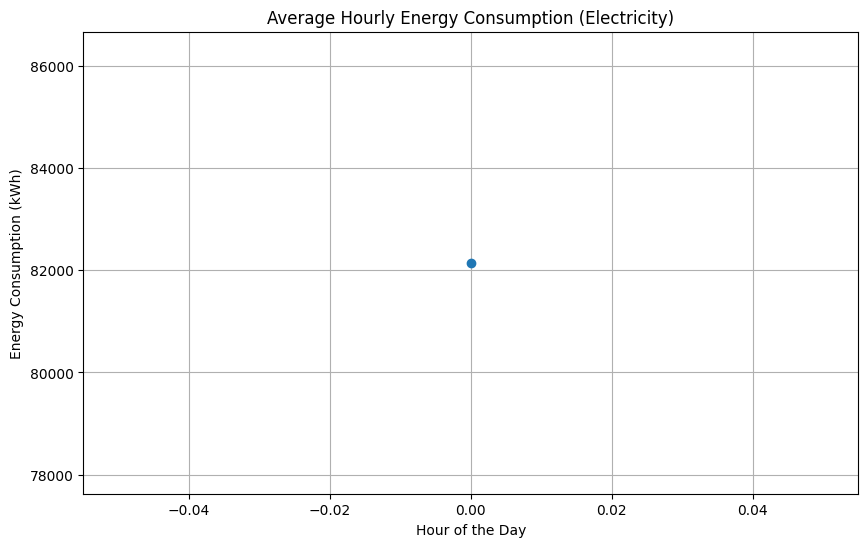

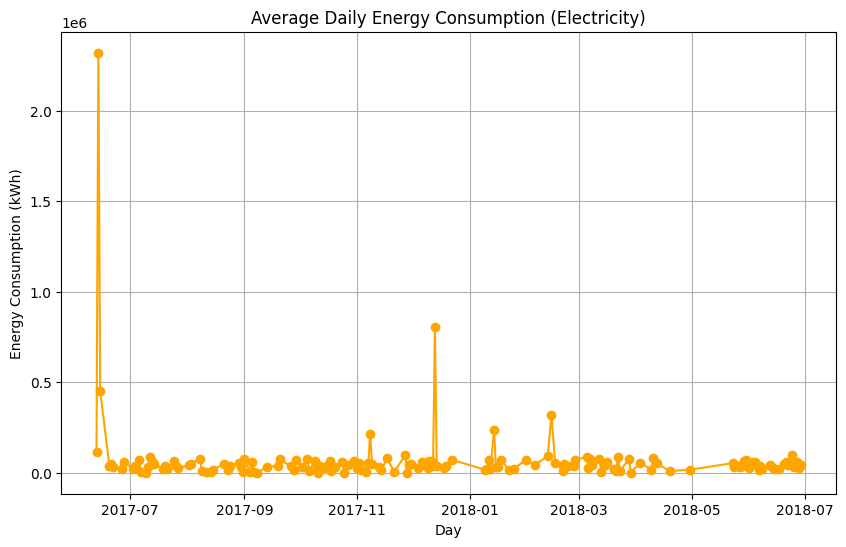

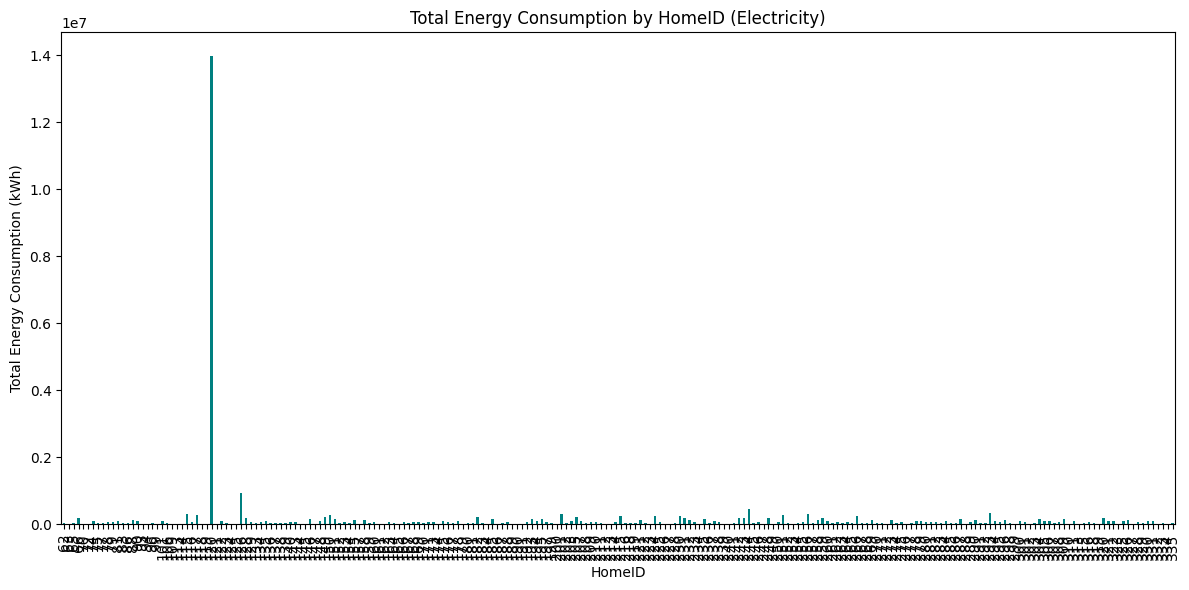

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the dataset
meterreading_df['date'] = pd.to_datetime(meterreading_df['date'])  # Convert date to datetime format
meterreading_df['day'] = meterreading_df['date'].dt.date           # Extract the day
meterreading_df['hour'] = meterreading_df['date'].dt.hour          # Extract the hour (if time data exists)

# Filter for electricity readings only (optional)
electricity_df = meterreading_df[meterreading_df['energytype'] == 'electricity']

# Time-Based Analysis: Hourly Trends (if hour data exists)
if 'hour' in electricity_df.columns:
    hourly_avg = electricity_df.groupby('hour')['reading'].mean()
    plt.figure(figsize=(10, 6))
    hourly_avg.plot(kind='line', marker='o')
    plt.title('Average Hourly Energy Consumption (Electricity)')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Energy Consumption (kWh)')
    plt.grid()
    plt.show()

# Time-Based Analysis: Daily Trends
daily_avg = electricity_df.groupby('day')['reading'].mean()
plt.figure(figsize=(10, 6))
daily_avg.plot(kind='line', marker='o', color='orange')
plt.title('Average Daily Energy Consumption (Electricity)')
plt.xlabel('Day')
plt.ylabel('Energy Consumption (kWh)')
plt.grid()
plt.show()

# Household-Level Analysis: Total Energy Usage by HomeID
total_usage = electricity_df.groupby('homeid')['reading'].sum()
plt.figure(figsize=(12, 6))
total_usage.plot(kind='bar', color='teal')
plt.title('Total Energy Consumption by HomeID (Electricity)')
plt.xlabel('HomeID')
plt.ylabel('Total Energy Consumption (kWh)')
plt.tight_layout()
plt.show()


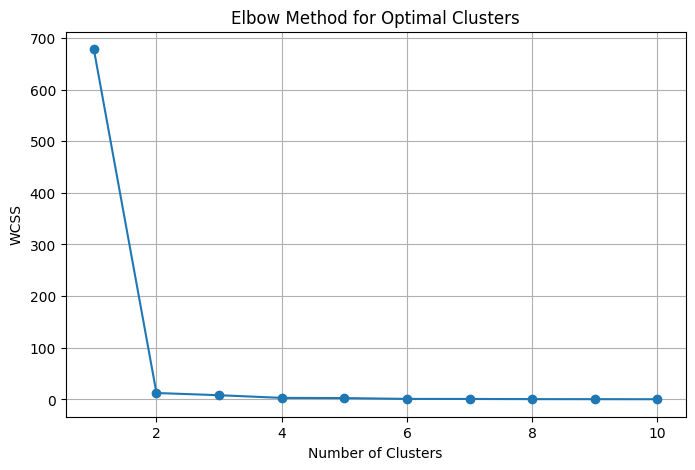

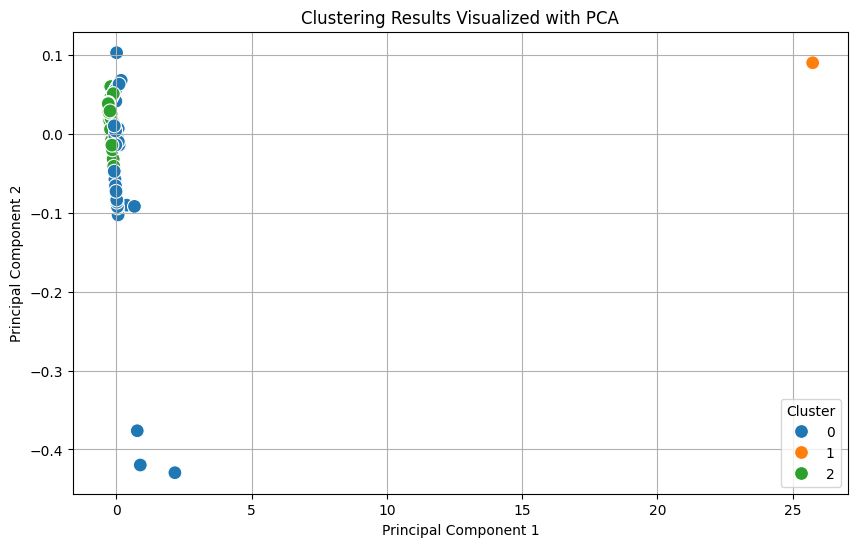

Cluster Summary:
           total_usage  average_usage    peak_usage
Cluster                                           
0        1.468375e+05   8.583748e+04  9.458498e+04
1        1.398420e+07   4.661400e+06  7.025674e+06
2        3.284969e+04   2.137729e+04  2.224147e+04


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load and prepare the dataset
meterreading_df['date'] = pd.to_datetime(meterreading_df['date'])  # Convert date to datetime format
meterreading_df['day'] = meterreading_df['date'].dt.date           # Extract the day
meterreading_df['hour'] = meterreading_df['date'].dt.hour          # Extract the hour (if time data exists)

# Filter for electricity readings only (optional)
electricity_df = meterreading_df[meterreading_df['energytype'] == 'electricity']

# Aggregate Data for Clustering
# Calculate features: total usage, average usage, and peak usage per household
clustering_data = electricity_df.groupby('homeid')['reading'].agg(
    total_usage='sum',
    average_usage='mean',
    peak_usage='max'
).reset_index()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_data[['total_usage', 'average_usage', 'peak_usage']])

# Apply K-Means Clustering
# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Perform K-Means Clustering with the chosen number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clustering Results with PCA
# Reduce dimensions to 2 for visualization using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
clustering_data['PC1'] = principal_components[:, 0]
clustering_data['PC2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustering_data, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=100)
plt.title('Clustering Results Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Analyze Cluster Characteristics
cluster_summary = clustering_data.groupby('Cluster')[['total_usage', 'average_usage', 'peak_usage']].mean()
print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
           total_usage  average_usage    peak_usage
Cluster                                           
0        1.468375e+05   8.583748e+04  9.458498e+04
1        1.398420e+07   4.661400e+06  7.025674e+06
2        3.284969e+04   2.137729e+04  2.224147e+04


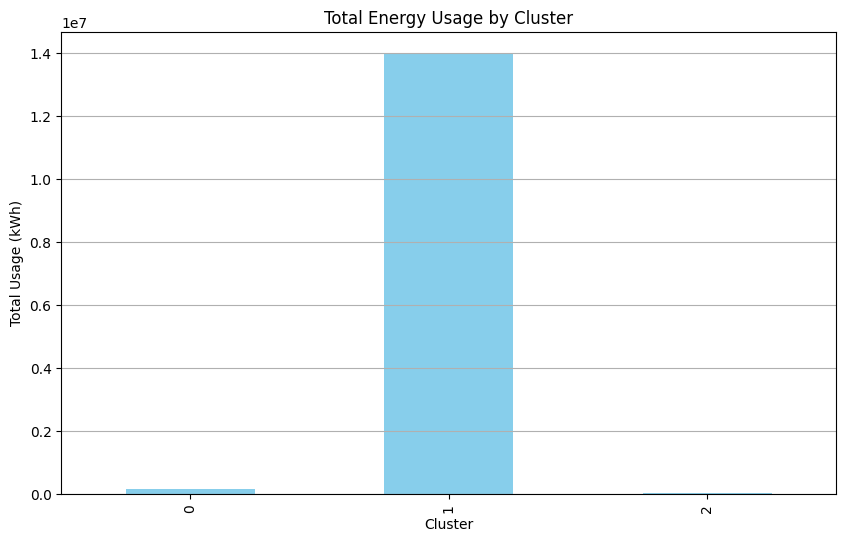

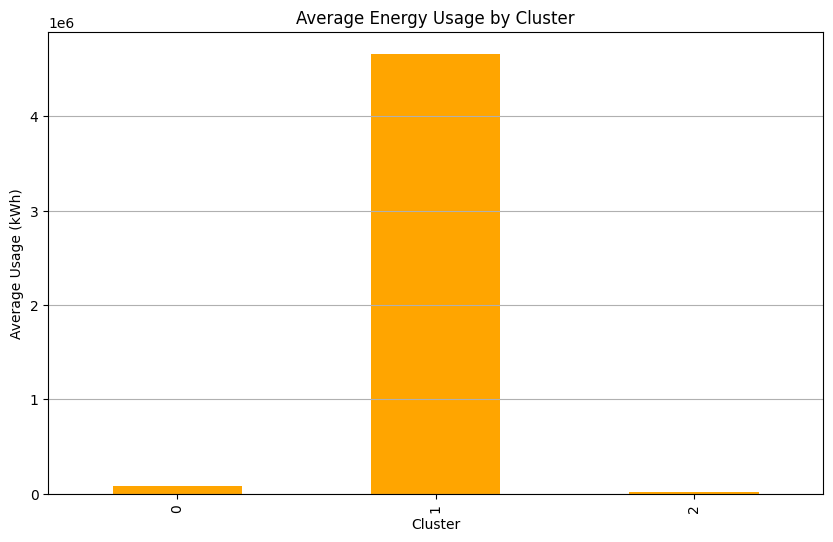

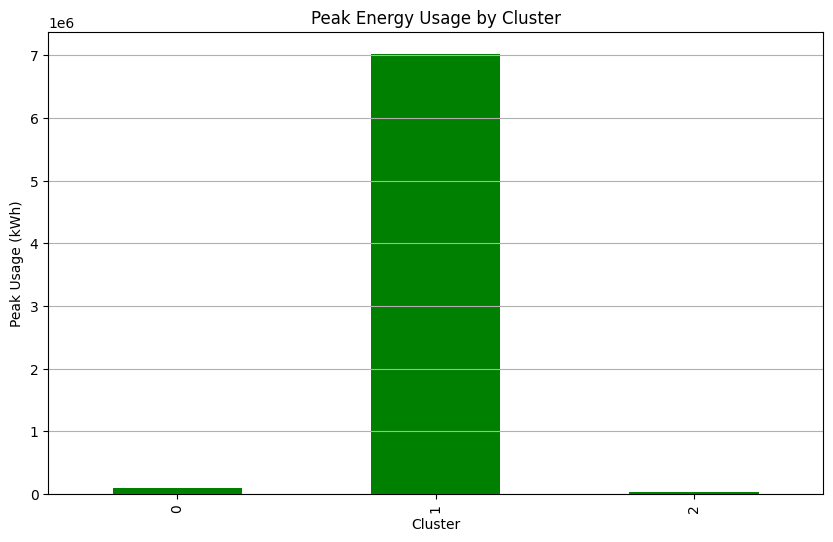

<ipython-input-49-8a0273517fff>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clustering_data, x='Cluster', y='total_usage', palette='Blues')


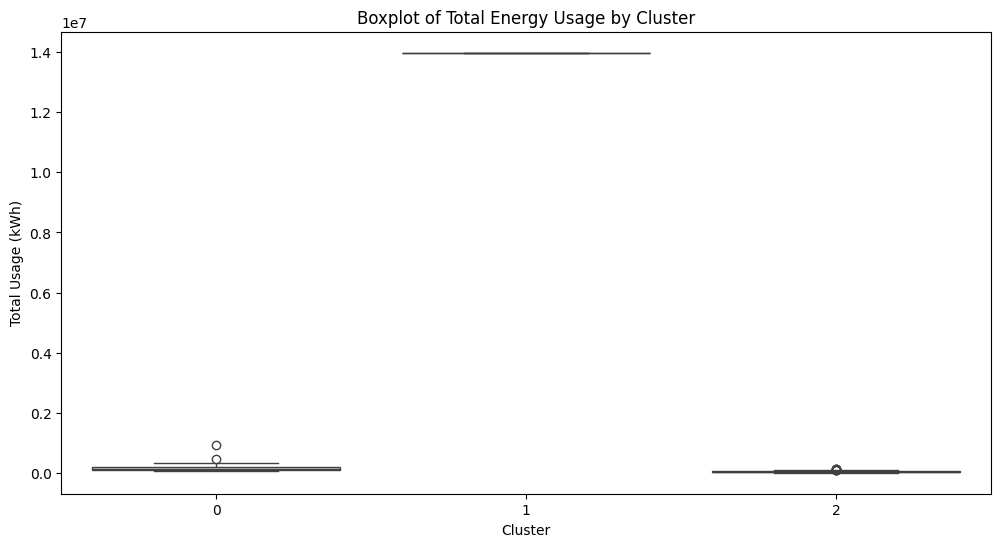

<ipython-input-49-8a0273517fff>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clustering_data, x='Cluster', y='average_usage', palette='Oranges')


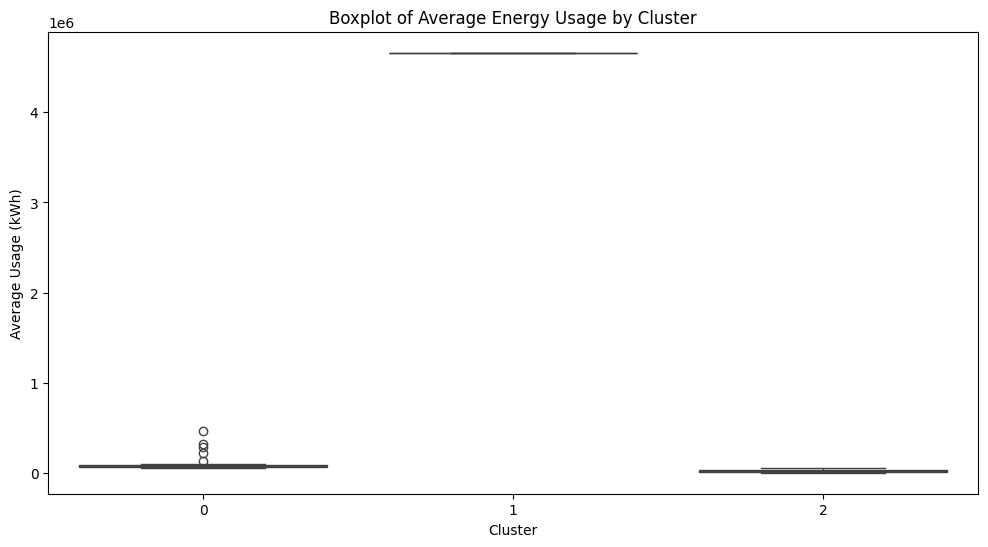

<ipython-input-49-8a0273517fff>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clustering_data, x='Cluster', y='peak_usage', palette='Greens')


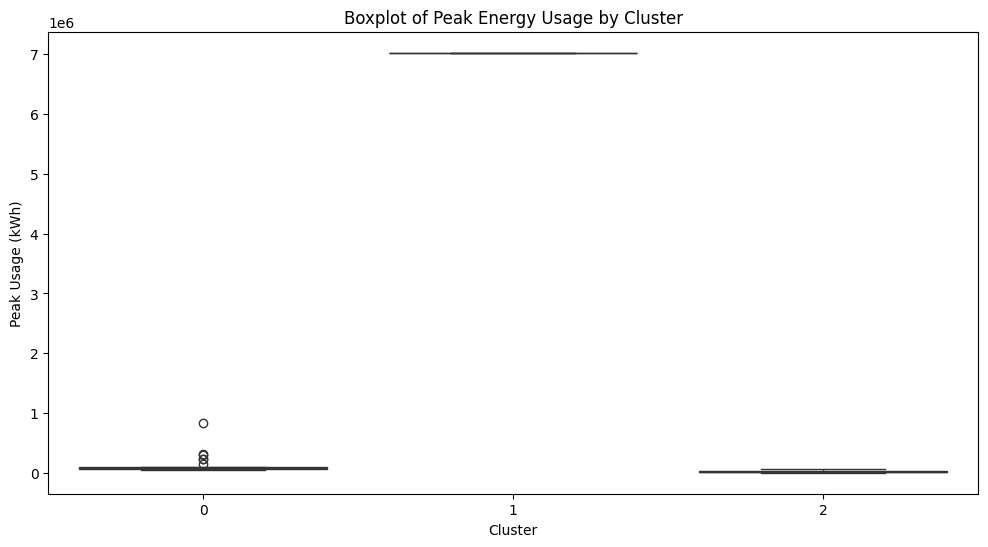

In [49]:
# Analyze Cluster Characteristics
cluster_summary = clustering_data.groupby('Cluster')[['total_usage', 'average_usage', 'peak_usage']].mean()
print("Cluster Summary:\n", cluster_summary)

# Visualize Cluster Characteristics: Bar Charts
plt.figure(figsize=(10, 6))
cluster_summary['total_usage'].plot(kind='bar', color='skyblue')
plt.title('Total Energy Usage by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Usage (kWh)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
cluster_summary['average_usage'].plot(kind='bar', color='orange')
plt.title('Average Energy Usage by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Usage (kWh)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
cluster_summary['peak_usage'].plot(kind='bar', color='green')
plt.title('Peak Energy Usage by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Peak Usage (kWh)')
plt.grid(axis='y')
plt.show()

# Visualize Cluster Characteristics: Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=clustering_data, x='Cluster', y='total_usage', palette='Blues')
plt.title('Boxplot of Total Energy Usage by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Usage (kWh)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=clustering_data, x='Cluster', y='average_usage', palette='Oranges')
plt.title('Boxplot of Average Energy Usage by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Usage (kWh)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=clustering_data, x='Cluster', y='peak_usage', palette='Greens')
plt.title('Boxplot of Peak Energy Usage by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Peak Usage (kWh)')
plt.show()


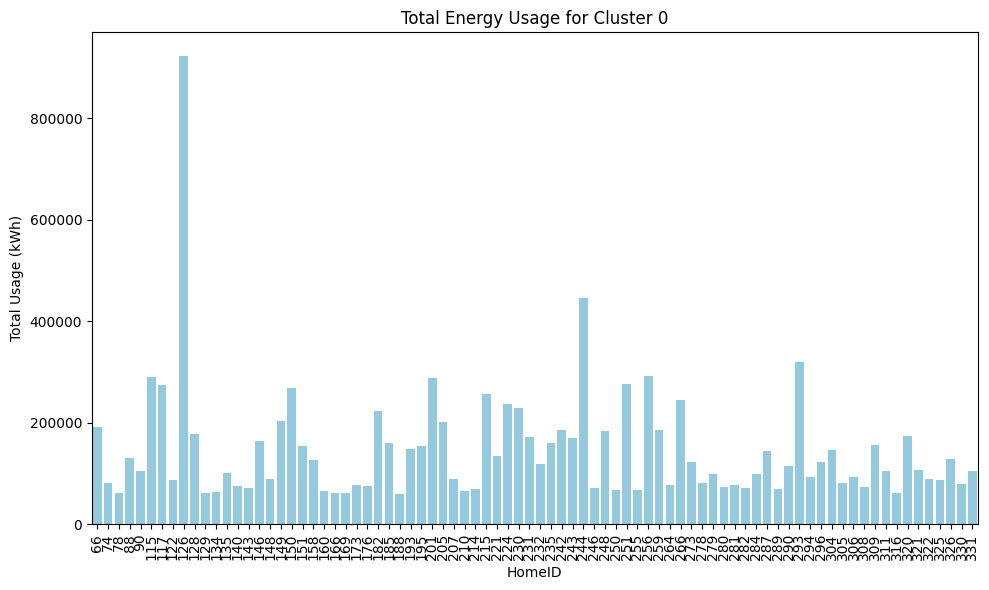

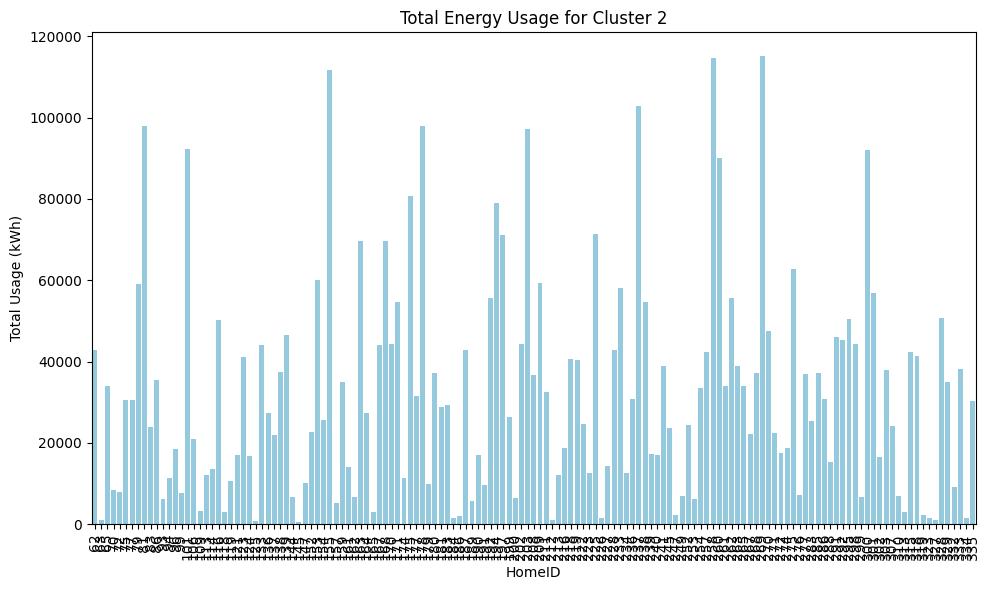

<ipython-input-50-47532f17f3c1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clustering_data, x='Cluster', y='total_usage', palette='Blues')


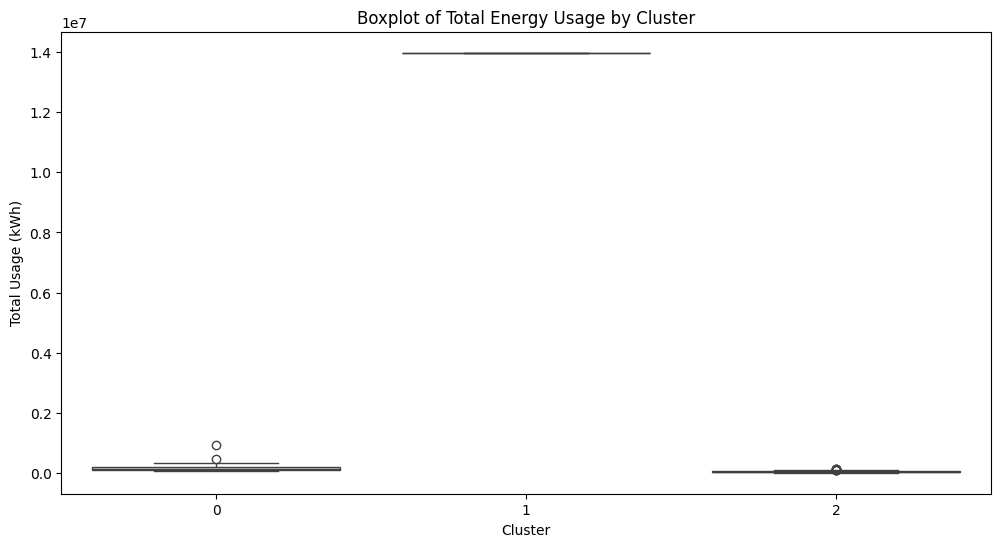

<ipython-input-50-47532f17f3c1>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clustering_data, x='Cluster', y='average_usage', palette='Oranges')


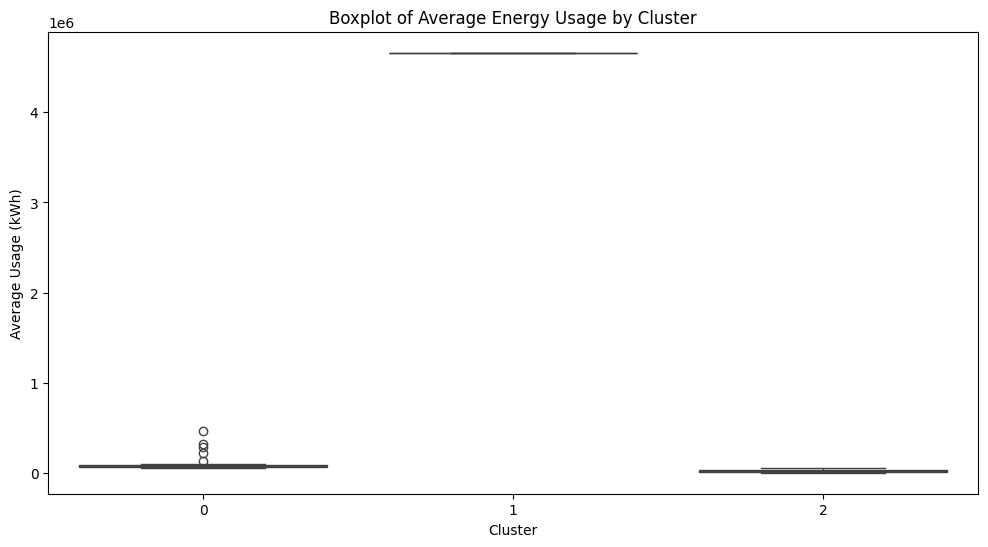

<ipython-input-50-47532f17f3c1>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clustering_data, x='Cluster', y='peak_usage', palette='Greens')


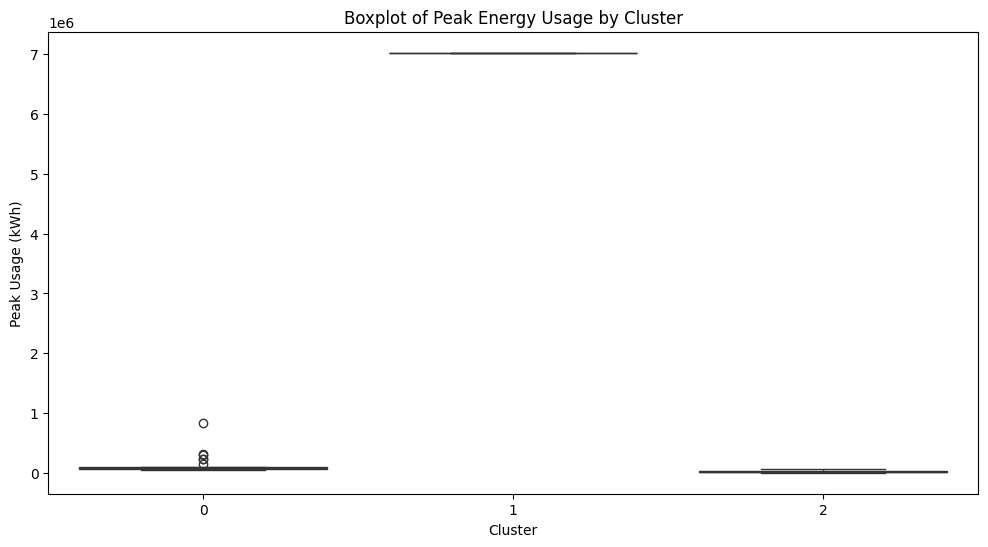

In [50]:
# Separate Bar Charts for Clusters 0 and 2
for cluster_id in [0, 2]:
    plt.figure(figsize=(10, 6))
    cluster_subset = clustering_data[clustering_data['Cluster'] == cluster_id]
    sns.barplot(data=cluster_subset, x='homeid', y='total_usage', color='skyblue')
    plt.title(f'Total Energy Usage for Cluster {cluster_id}')
    plt.xlabel('HomeID')
    plt.ylabel('Total Usage (kWh)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Visualize Cluster Characteristics: Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=clustering_data, x='Cluster', y='total_usage', palette='Blues')
plt.title('Boxplot of Total Energy Usage by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Usage (kWh)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=clustering_data, x='Cluster', y='average_usage', palette='Oranges')
plt.title('Boxplot of Average Energy Usage by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Usage (kWh)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=clustering_data, x='Cluster', y='peak_usage', palette='Greens')
plt.title('Boxplot of Peak Energy Usage by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Peak Usage (kWh)')
plt.show()

Cluster Summary:
           total_usage  average_usage    peak_usage
Cluster                                           
0        1.468375e+05   8.583748e+04  9.458498e+04
1        1.398420e+07   4.661400e+06  7.025674e+06
2        3.284969e+04   2.137729e+04  2.224147e+04


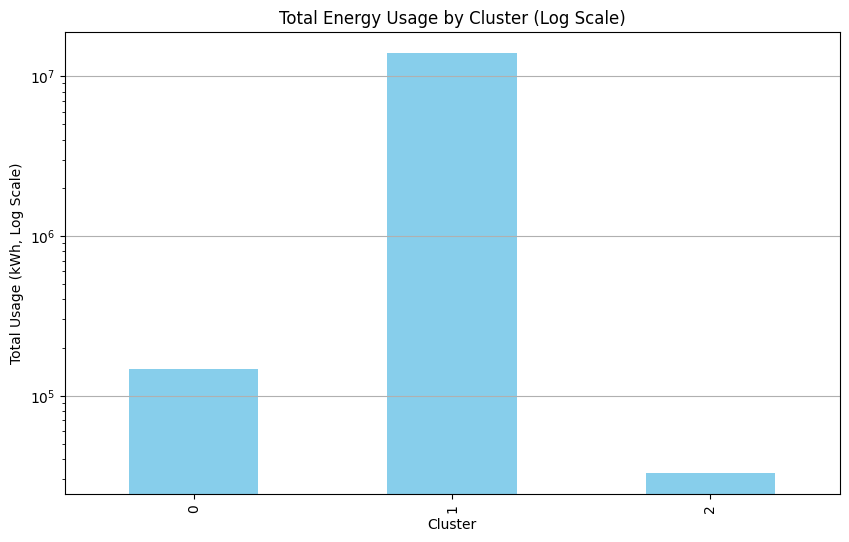

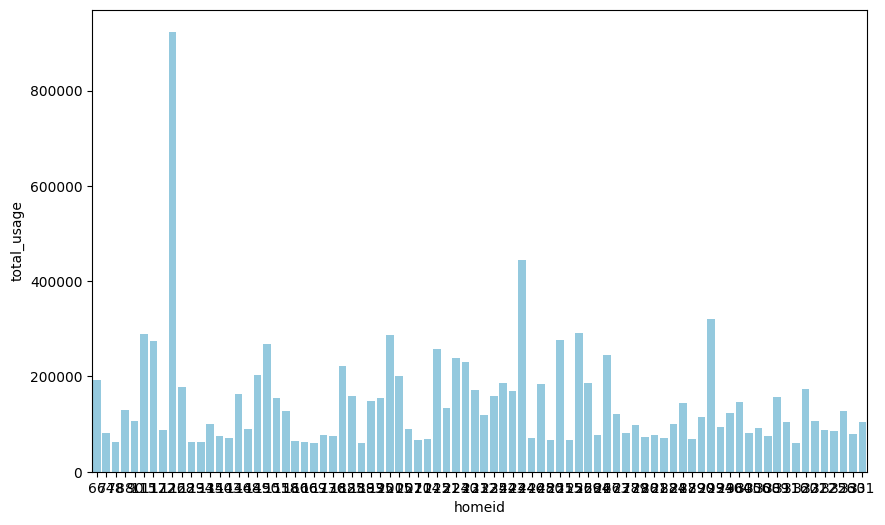

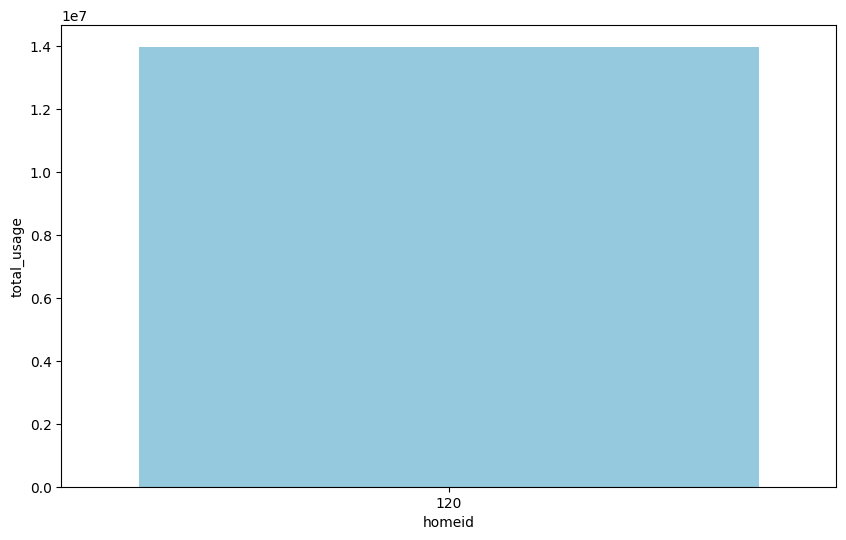

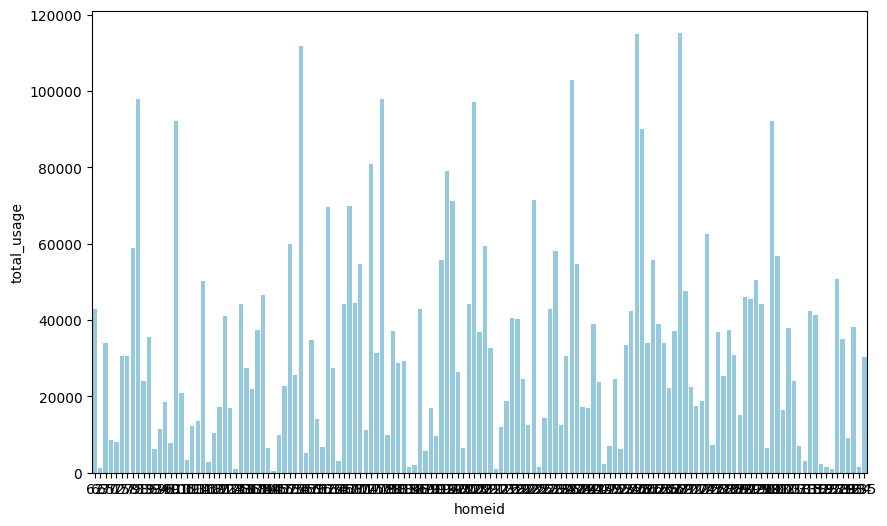

In [51]:
# Analyze Cluster Characteristics
cluster_summary = clustering_data.groupby('Cluster')[['total_usage', 'average_usage', 'peak_usage']].mean()
print("Cluster Summary:\n", cluster_summary)

# Visualize Cluster Characteristics: Bar Charts (Log Scale)
plt.figure(figsize=(10, 6))
cluster_summary['total_usage'].plot(kind='bar', color='skyblue', logy=True)
plt.title('Total Energy Usage by Cluster (Log Scale)')
plt.xlabel('Cluster')
plt.ylabel('Total Usage (kWh, Log Scale)')
plt.grid(axis='y')
plt.show()

# Separate Bar Charts for Each Cluster
for cluster_id in [0, 1, 2]:
    plt.figure(figsize=(10, 6))
    cluster_subset = clustering_data[clustering_data['Cluster'] == cluster_id]
    sns.barplot(data=cluster_subset, x='homeid', y='total_usage', color='skyblue')


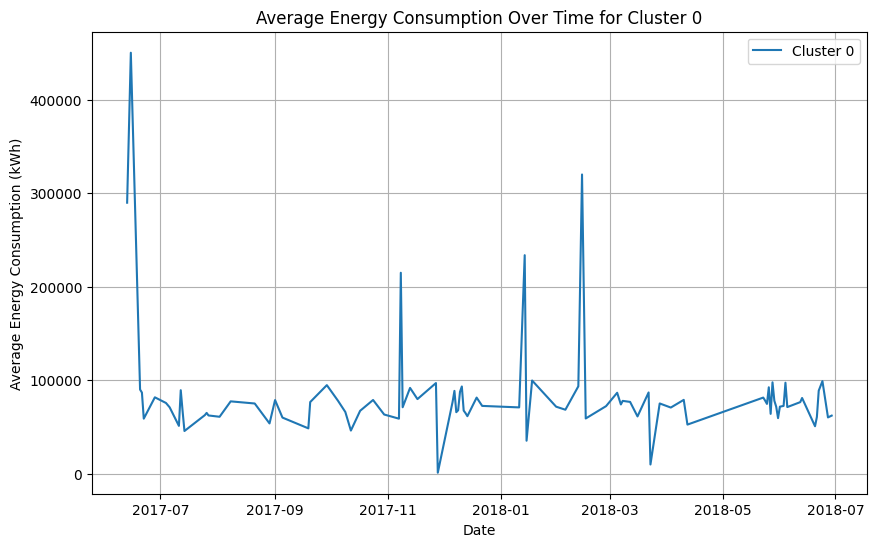

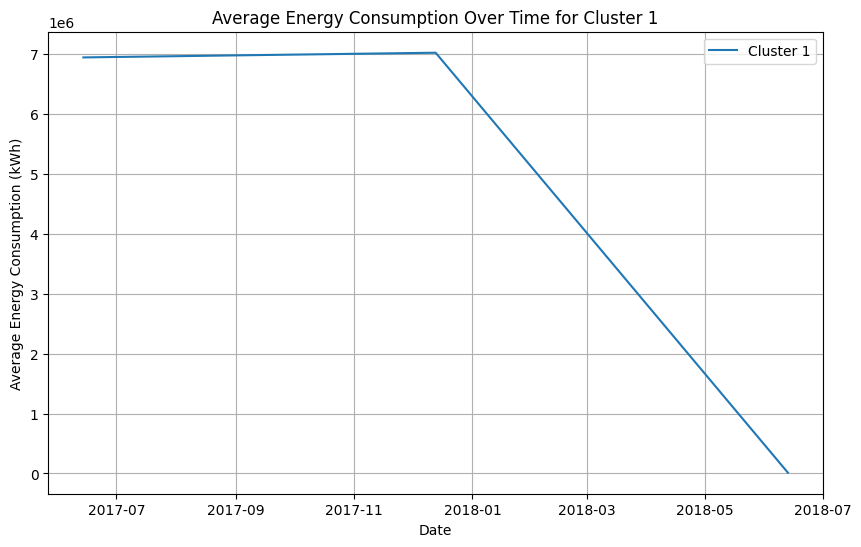

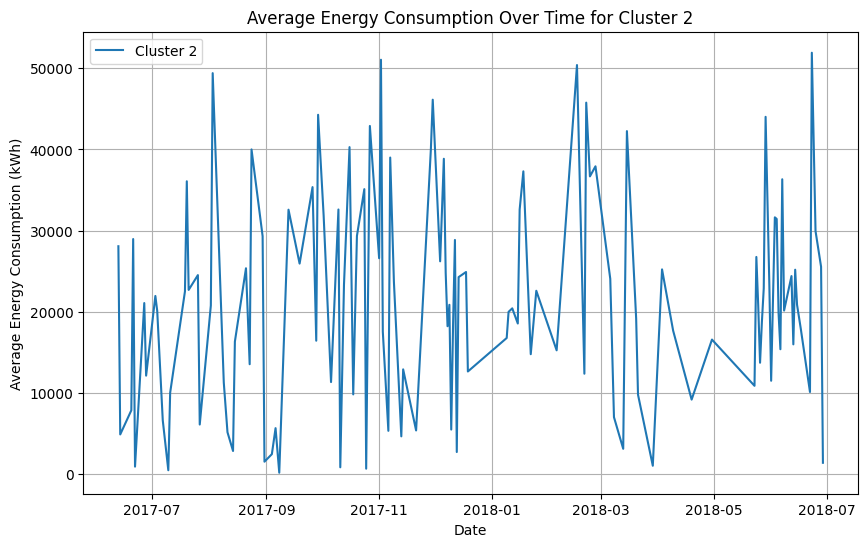

In [52]:
# Visualize Cluster Characteristics Over Time (Line Plots)
for cluster_id in [0, 1, 2]:
    cluster_subset = electricity_df[electricity_df['homeid'].isin(clustering_data[clustering_data['Cluster'] == cluster_id]['homeid'])]
    daily_avg = cluster_subset.groupby('day')['reading'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(daily_avg.index, daily_avg.values, label=f'Cluster {cluster_id}')
    plt.title(f'Average Energy Consumption Over Time for Cluster {cluster_id}')
    plt.xlabel('Date')
    plt.ylabel('Average Energy Consumption (kWh)')
    plt.grid()
    plt.legend()
    plt.show()

In [53]:
# Load additional datasets
home_df = pd.read_csv('home.csv')  # Adjust the file path as necessary
appliance_df = pd.read_csv('appliance.csv')  # Adjust the file path as necessary

# Merge meterreading with home.csv
merged_df = pd.merge(meterreading_df, home_df, on='homeid', how='left')

# Merge the result with appliance.csv
merged_df = pd.merge(merged_df, appliance_df, on='homeid', how='left')

# Check the merged dataset
print("Merged Dataset:\n", merged_df.head())
print("Columns in Merged Dataset:\n", merged_df.columns)

# Handle missing values if necessary
missing_values = merged_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Optionally drop rows with missing values or impute them
# merged_df.dropna(inplace=True)  # Drop rows with missing values


Merged Dataset:
    homeid  provenance provenancedetail   energytype       date  reading  \
0      77  technician     repair_visit  electricity 2018-01-16  30561.0   
1      77  technician     repair_visit  electricity 2018-01-16  30561.0   
2      77  technician     repair_visit  electricity 2018-01-16  30561.0   
3      77  technician     repair_visit  electricity 2018-01-16  30561.0   
4      77  technician     repair_visit  electricity 2018-01-16  30561.0   

          day  hour install_type   location  ...  entry_floor  outdoor_space  \
0  2018-01-16     0     standard  Edinburgh  ...       Ground  Yes - private   
1  2018-01-16     0     standard  Edinburgh  ...       Ground  Yes - private   
2  2018-01-16     0     standard  Edinburgh  ...       Ground  Yes - private   
3  2018-01-16     0     standard  Edinburgh  ...       Ground  Yes - private   
4  2018-01-16     0     standard  Edinburgh  ...       Ground  Yes - private   

  outdoor_drying applianceid roomid applianceclass 

In [54]:
# Impute missing values for categorical columns with mode
merged_df['powertype'].fillna(merged_df['powertype'].mode()[0], inplace=True)
merged_df['smart_automation'].fillna(merged_df['smart_automation'].mode()[0], inplace=True)

# Drop columns with excessive missing values (if not critical)
merged_df.drop(columns=['starttime_enhanced', 'new_build_year'], inplace=True)

# For outdoor_drying, fill missing values with 'unknown'
merged_df['outdoor_drying'].fillna('unknown', inplace=True)

# Verify the cleaned dataset
print("Missing Values After Cleaning:\n", merged_df.isnull().sum())


Missing Values After Cleaning:
 homeid                0
provenance            0
provenancedetail      0
energytype            0
date                  0
reading               0
day                   0
hour                  0
install_type          0
location              0
residents             0
starttime             0
endtime               0
cohortid              0
income_band           0
study_class           0
hometype              0
equivalised_income    0
occupancy             0
urban_rural_class     0
urban_rural_name      0
build_era             0
smart_monitors        0
smart_automation      0
occupied_days         0
occupied_nights       0
entry_floor           0
outdoor_space         0
outdoor_drying        0
applianceid           0
roomid                0
applianceclass        0
powertype             0
appliancetype         0
appliancesubtype      0
number                0
dtype: int64


<ipython-input-54-35d83c81674a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['powertype'].fillna(merged_df['powertype'].mode()[0], inplace=True)
<ipython-input-54-35d83c81674a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

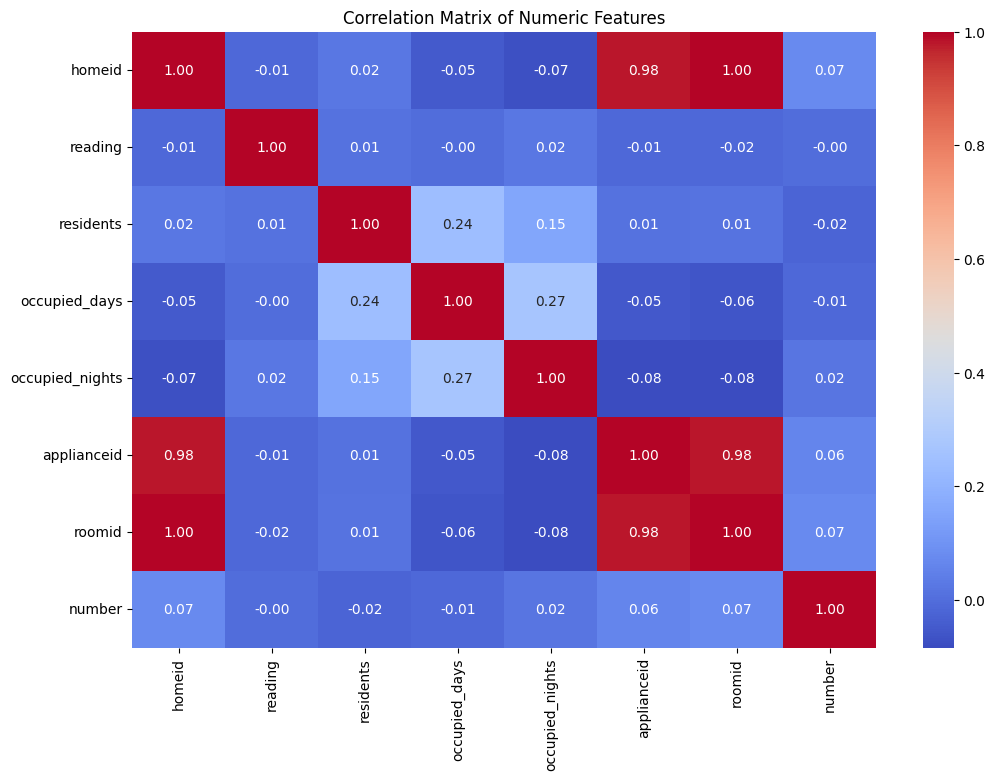

In [55]:
# Correlation matrix for numeric columns
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_df[numeric_columns].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


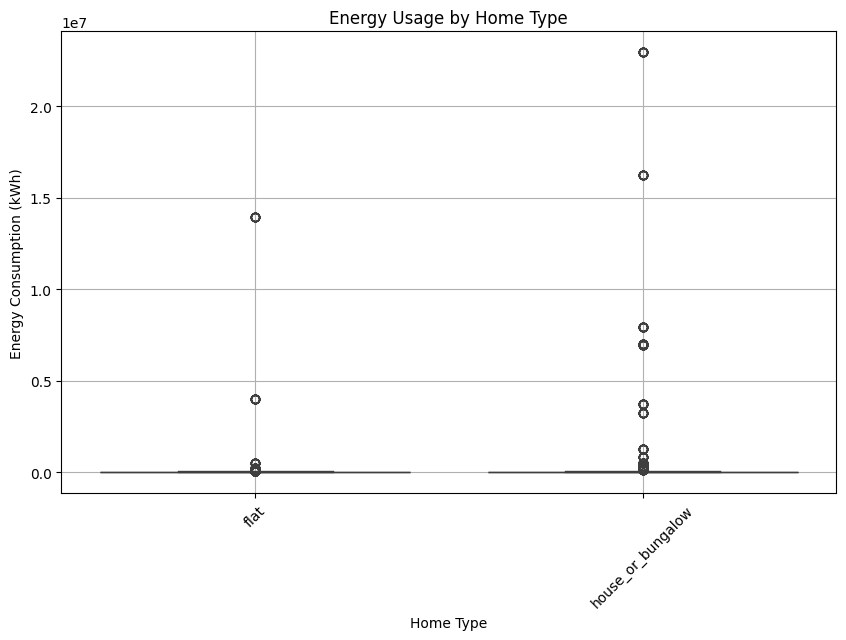

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='hometype', y='reading')
plt.title('Energy Usage by Home Type')
plt.xlabel('Home Type')
plt.ylabel('Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid()
plt.show()


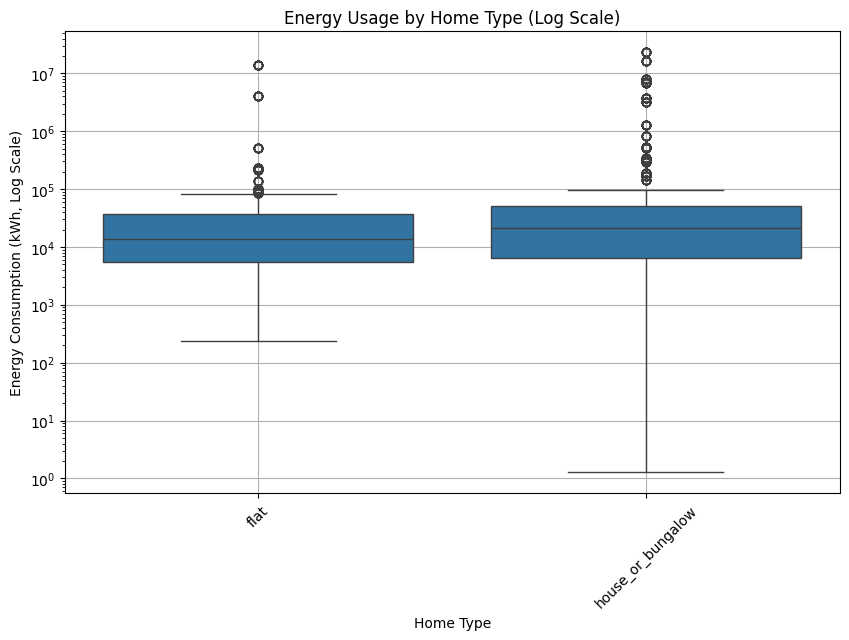

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='hometype', y='reading')
plt.yscale('log')
plt.title('Energy Usage by Home Type (Log Scale)')
plt.xlabel('Home Type')
plt.ylabel('Energy Consumption (kWh, Log Scale)')
plt.xticks(rotation=45)
plt.grid()
plt.show()


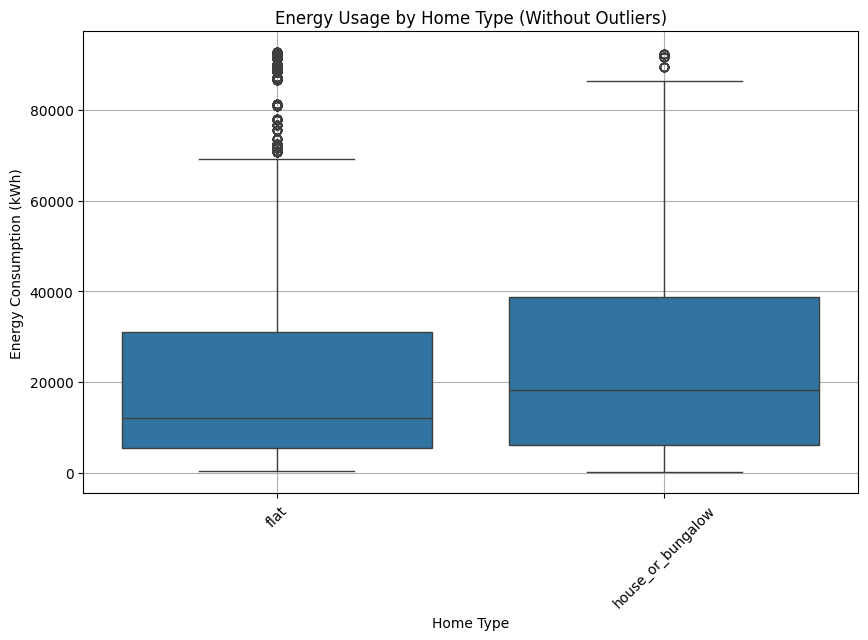

In [58]:
# Remove outliers based on a threshold
threshold = merged_df['reading'].quantile(0.95)  # Top 5% of energy usage
filtered_df = merged_df[merged_df['reading'] <= threshold]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='hometype', y='reading')
plt.title('Energy Usage by Home Type (Without Outliers)')
plt.xlabel('Home Type')
plt.ylabel('Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid()
plt.show()


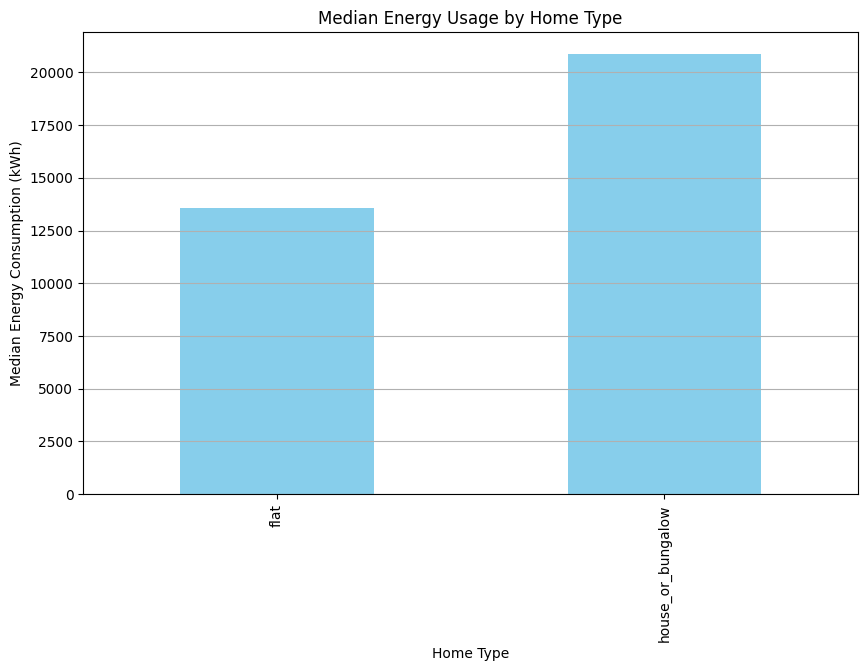

In [59]:
usage_summary = merged_df.groupby('hometype')['reading'].median()  # Use mean or median
plt.figure(figsize=(10, 6))
usage_summary.plot(kind='bar', color='skyblue')
plt.title('Median Energy Usage by Home Type')
plt.xlabel('Home Type')
plt.ylabel('Median Energy Consumption (kWh)')
plt.grid(axis='y')
plt.show()


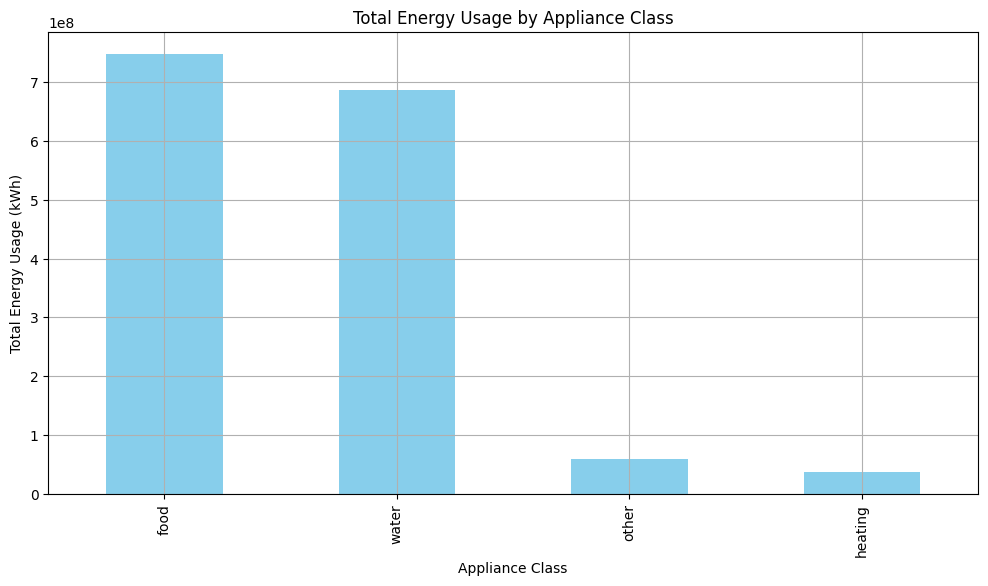

In [60]:
appliance_usage = merged_df.groupby('applianceclass')['reading'].sum()
appliance_usage.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
appliance_usage.plot(kind='bar', color='skyblue')
plt.title('Total Energy Usage by Appliance Class')
plt.xlabel('Appliance Class')
plt.ylabel('Total Energy Usage (kWh)')
plt.grid()
plt.show()


In [61]:
merged_df['usage_per_resident'] = merged_df['reading'] / merged_df['residents']


In [62]:
merged_df['consumption_category'] = pd.qcut(merged_df['reading'], q=3, labels=['Low', 'Medium', 'High'])


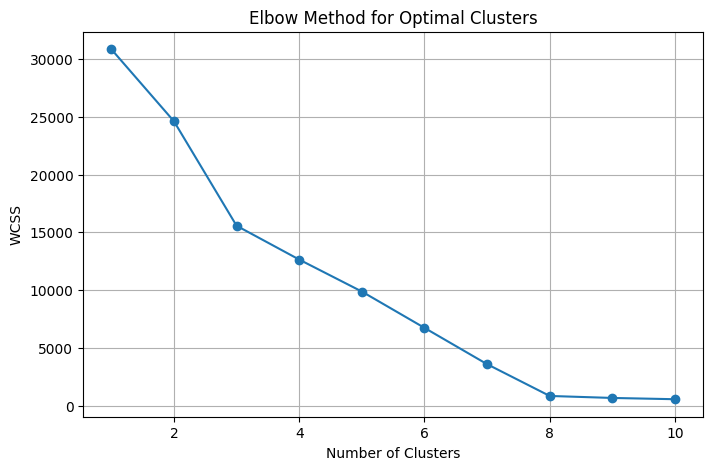

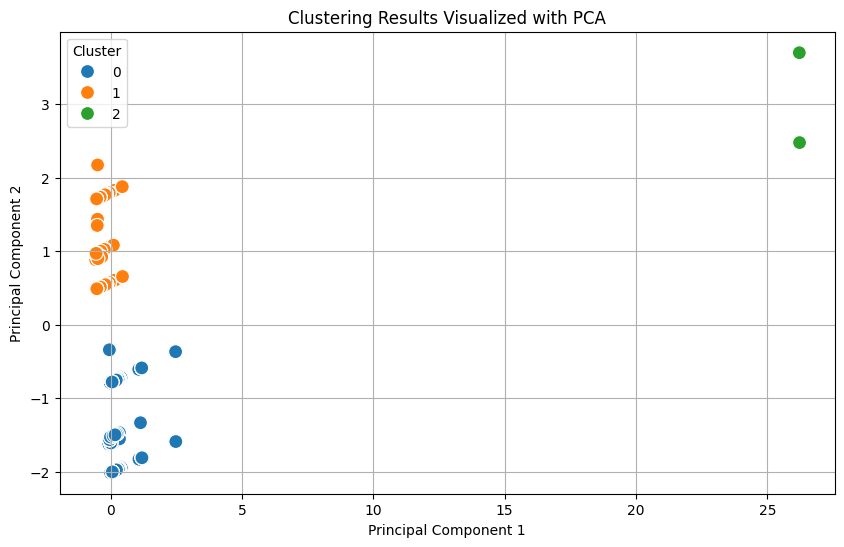

Cluster Summary:
           total_usage  average_usage    peak_usage  usage_per_resident
Cluster                                                               
0        7.899549e+04   4.794169e+04  5.284776e+04                 inf
1        6.685888e+04   3.998403e+04  4.177325e+04                 inf
2        1.398420e+07   4.661400e+06  7.025674e+06          13984200.0


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Merge with home.csv and appliance.csv to include additional features
home_df = pd.read_csv('home.csv')
appliance_df = pd.read_csv('appliance.csv')
merged_df = pd.merge(clustering_data, home_df, on='homeid', how='left')
merged_df = pd.merge(merged_df, appliance_df, on='homeid', how='left')

# Create derived features
merged_df['usage_per_resident'] = merged_df['total_usage'] / merged_df['residents']

# Handle missing values for numeric features
merged_df['usage_per_resident'] = merged_df['usage_per_resident'].fillna(0)

# Select features for clustering
features = ['total_usage', 'average_usage', 'peak_usage', 'usage_per_resident', 'hometype', 'applianceclass']

# One-Hot Encode categorical variables
encoder = OneHotEncoder(sparse_output=False)  # Use `sparse_output=False` for dense arrays
encoded_features = encoder.fit_transform(merged_df[['hometype', 'applianceclass']])

# Combine encoded categorical and numerical features
numeric_features = merged_df[['total_usage', 'average_usage', 'peak_usage', 'usage_per_resident']].fillna(0).values
final_features = np.hstack((numeric_features, encoded_features))

# Handle NaN, infinite, or extreme values
final_features = np.nan_to_num(final_features, nan=0.0, posinf=1e10, neginf=0.0)
final_features = np.clip(final_features, a_min=-1e10, a_max=1e10)

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(final_features)


# Apply K-Means Clustering
# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Perform K-Means Clustering with the chosen number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clustering Results with PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
merged_df['PC1'] = principal_components[:, 0]
merged_df['PC2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=100)
plt.title('Clustering Results Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Analyze Cluster Characteristics
cluster_summary = merged_df.groupby('Cluster')[['total_usage', 'average_usage', 'peak_usage', 'usage_per_resident']].mean()
print("Cluster Summary:\n", cluster_summary)

# Save the clustering results to a new CSV file
merged_df.to_csv('household_clustering_results.csv', index=False)



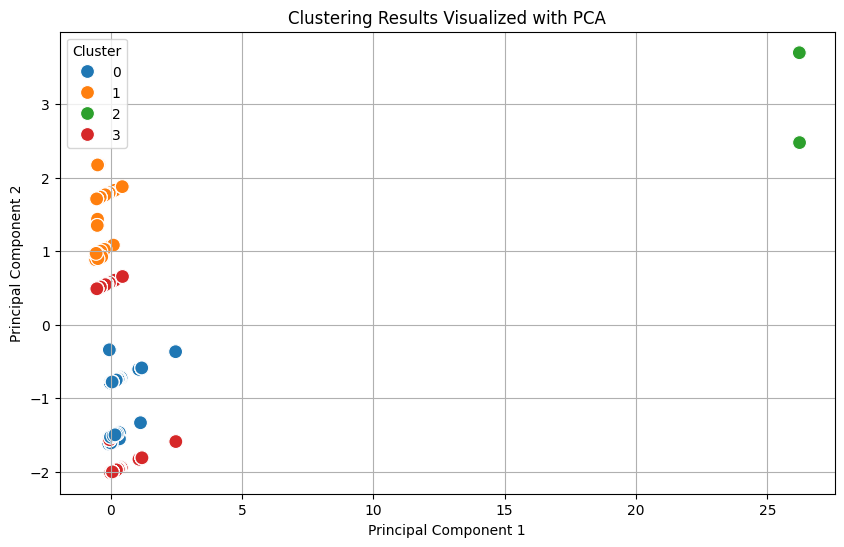

Cluster Summary:
           total_usage  average_usage    peak_usage  usage_per_resident
Cluster                                                               
0        8.091234e+04   4.792323e+04  5.313995e+04                 inf
1        6.634249e+04   3.958888e+04  4.143123e+04                 inf
2        1.398420e+07   4.661400e+06  7.025674e+06          13984200.0
3        7.192117e+04   4.406145e+04  4.713064e+04                 inf


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Merge with home.csv and appliance.csv to include additional features
home_df = pd.read_csv('home.csv')
appliance_df = pd.read_csv('appliance.csv')
merged_df = pd.merge(clustering_data, home_df, on='homeid', how='left')
merged_df = pd.merge(merged_df, appliance_df, on='homeid', how='left')

# Create derived features
merged_df['usage_per_resident'] = merged_df['total_usage'] / merged_df['residents']

# Handle missing values for numeric features
merged_df['usage_per_resident'] = merged_df['usage_per_resident'].fillna(0)

# Select features for clustering
features = ['total_usage', 'average_usage', 'peak_usage', 'usage_per_resident', 'hometype', 'applianceclass']

# One-Hot Encode categorical variables
encoder = OneHotEncoder(sparse_output=False)  # Use `sparse_output=False` for dense arrays
encoded_features = encoder.fit_transform(merged_df[['hometype', 'applianceclass']])

# Combine encoded categorical and numerical features
numeric_features = merged_df[['total_usage', 'average_usage', 'peak_usage', 'usage_per_resident']].fillna(0).values
final_features = np.hstack((numeric_features, encoded_features))

# Handle NaN, infinite, or extreme values
final_features = np.nan_to_num(final_features, nan=0.0, posinf=1e10, neginf=0.0)
final_features = np.clip(final_features, a_min=-1e10, a_max=1e10)

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(final_features)

# Apply K-Means Clustering with 4 clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clustering Results with PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
merged_df['PC1'] = principal_components[:, 0]
merged_df['PC2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=100)
plt.title('Clustering Results Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Analyze Cluster Characteristics
cluster_summary = merged_df.groupby('Cluster')[['total_usage', 'average_usage', 'peak_usage', 'usage_per_resident']].mean()
print("Cluster Summary:\n", cluster_summary)

# Save the clustering results to a new CSV file
merged_df.to_csv('household_clustering_results.csv', index=False)


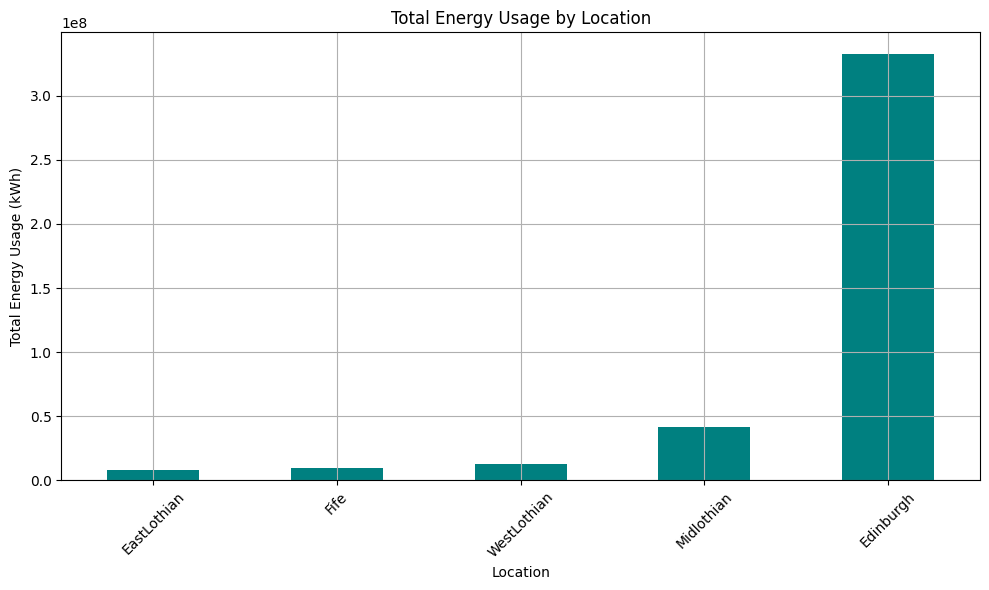

In [65]:
# Total energy usage by location
location_usage = merged_df.groupby('location')['total_usage'].sum().sort_values()

plt.figure(figsize=(10, 6))
location_usage.plot(kind='bar', color='teal')
plt.title('Total Energy Usage by Location')
plt.xlabel('Location')
plt.ylabel('Total Energy Usage (kWh)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


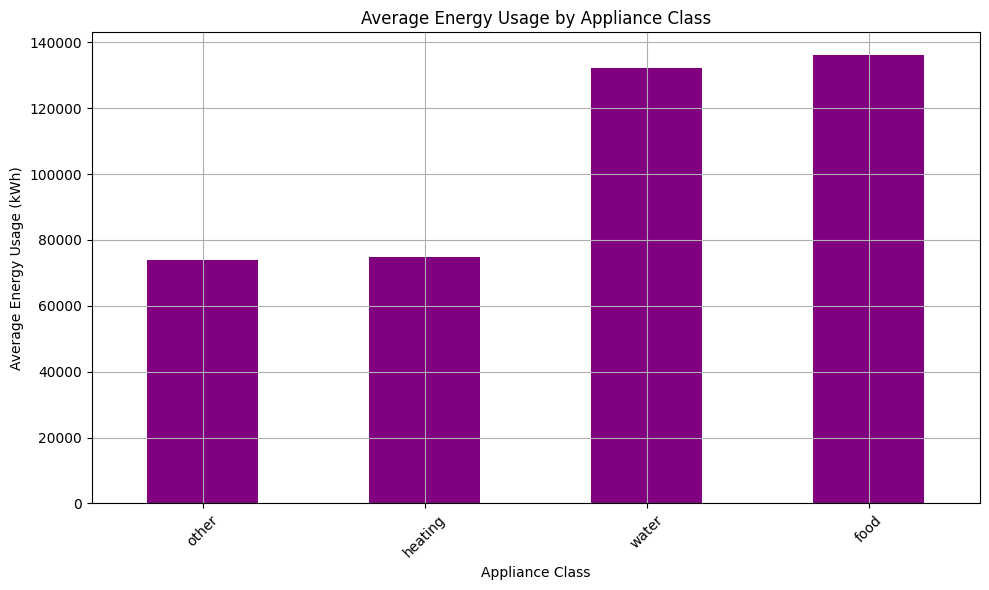

In [66]:
# Average energy usage by appliance class
appliance_usage = merged_df.groupby('applianceclass')['total_usage'].mean().sort_values()

plt.figure(figsize=(10, 6))
appliance_usage.plot(kind='bar', color='purple')
plt.title('Average Energy Usage by Appliance Class')
plt.xlabel('Appliance Class')
plt.ylabel('Average Energy Usage (kWh)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


<ipython-input-67-7095aebb2618>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='residents', y='total_usage', palette='coolwarm')


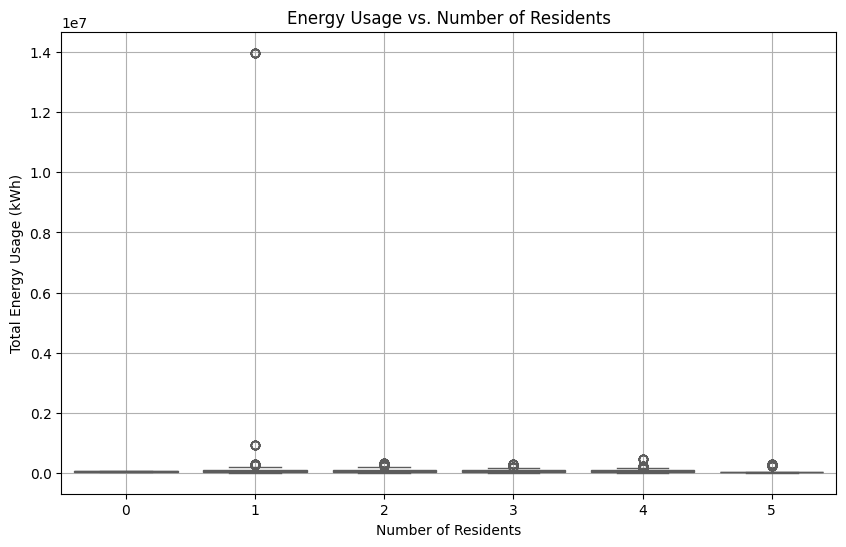

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='residents', y='total_usage', palette='coolwarm')
plt.title('Energy Usage vs. Number of Residents')
plt.xlabel('Number of Residents')
plt.ylabel('Total Energy Usage (kWh)')
plt.grid()
plt.show()


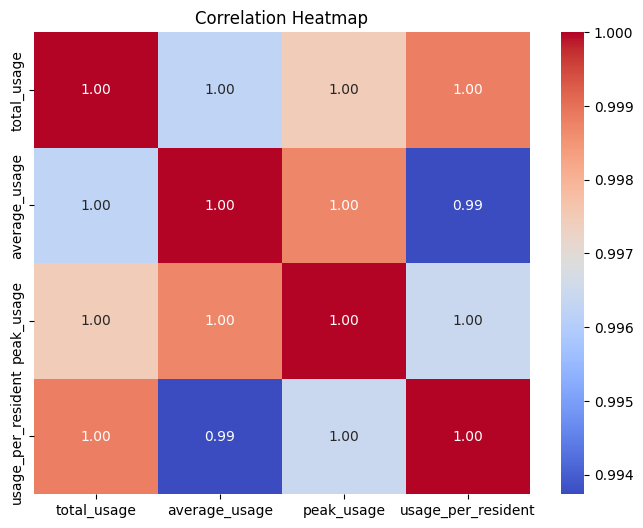

In [68]:
# Correlation matrix
correlation_matrix = merged_df[['total_usage', 'average_usage', 'peak_usage', 'usage_per_resident']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


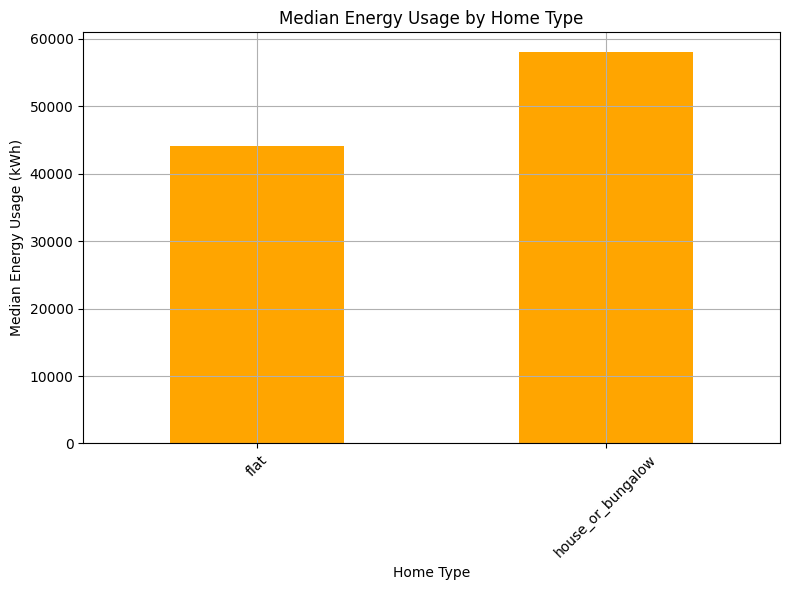

In [69]:
home_type_usage = merged_df.groupby('hometype')['total_usage'].median()

plt.figure(figsize=(8, 6))
home_type_usage.plot(kind='bar', color='orange')
plt.title('Median Energy Usage by Home Type')
plt.xlabel('Home Type')
plt.ylabel('Median Energy Usage (kWh)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


In [70]:
daily_usage = merged_df.groupby('date')['total_usage'].sum()

plt.figure(figsize=(10, 6))
daily_usage.plot(kind='line', color='blue', marker='o')
plt.title('Daily Energy Usage Trends')
plt.xlabel('Date')
plt.ylabel('Total Energy Usage (kWh)')
plt.grid()
plt.tight_layout()
plt.show()


KeyError: 'date'

In [71]:
import pandas as pd

# Load the weather data
weather_df = pd.read_csv('weatherfeed.csv')

# Display basic information and the first few rows
print(weather_df.info())
print(weather_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   feedid        25 non-null     int64 
 1   weather_type  25 non-null     object
 2   locationid    25 non-null     object
 3   unit          20 non-null     object
 4   source        25 non-null     object
 5   url           25 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.3+ KB
None
   feedid   weather_type locationid    unit  \
0       1    temperature  Edinburgh    0.1C   
1       2     conditions  Edinburgh    text   
2       3       humidity  Edinburgh    0.1%   
3       4      windspeed  Edinburgh  0.1kph   
4       5  winddirection  Edinburgh     NaN   

                                              source  \
0  Weather Underground (https://www.wunderground....   
1  Weather Underground (https://www.wunderground....   
2  Weather Underground (https://www.wunderground....   


In [72]:
print(merged_df['location'].unique())
print(weather_df['locationid'].unique())

# Merge on location
merged_with_weather = pd.merge(merged_df, weather_df, left_on='location', right_on='locationid', how='left')

# Inspect the merged dataset
print(merged_with_weather.head())
print(merged_with_weather.isnull().sum())



['Edinburgh' 'Midlothian' 'WestLothian' 'EastLothian' 'Fife']
['Edinburgh' 'Midlothian' 'WestLothian' 'EastLothian' 'Fife']
   homeid  total_usage  average_usage  peak_usage  Cluster       PC1  \
0      62      42885.0        42885.0     42885.0        1 -0.380771   
1      62      42885.0        42885.0     42885.0        1 -0.380771   
2      62      42885.0        42885.0     42885.0        1 -0.380771   
3      62      42885.0        42885.0     42885.0        1 -0.380771   
4      62      42885.0        42885.0     42885.0        1 -0.380771   

        PC2 install_type   location  residents  ... appliancetype  \
0  1.737893     enhanced  Edinburgh          2  ...        gashob   
1  1.737893     enhanced  Edinburgh          2  ...        gashob   
2  1.737893     enhanced  Edinburgh          2  ...        gashob   
3  1.737893     enhanced  Edinburgh          2  ...        gashob   
4  1.737893     enhanced  Edinburgh          2  ...        gashob   

  appliancesubtype number us

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the dataset is merged correctly
if 'weather_type' in merged_with_weather.columns and 'reading' in merged_with_weather.columns:
    # Group by location and weather type to calculate average energy usage
    avg_usage_by_weather = merged_with_weather.groupby(['location', 'weather_type'])['reading'].mean().reset_index()

    # Create a bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(data=avg_usage_by_weather, x='weather_type', y='reading', hue='location', ci=None)
    plt.title('Average Energy Usage by Weather Type Across Locations')
    plt.xlabel('Weather Type')
    plt.ylabel('Average Energy Usage (kWh)')
    plt.xticks(rotation=45)
    plt.legend(title='Location')
    plt.tight_layout()
    plt.show()
